In [25]:
#!pip install census

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st

from census import Census
from config import api_key

c = Census(api_key, year = 2019)

In [3]:
#load in CSV
used_string = "Bexar_County_COVID-19_Data_by_Zip_code.csv"

bexar_df = pd.read_csv(used_string)
bexar_df.head()

,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546
1,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922
4,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147


In [4]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E"),  {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B19013_001E": "Median Household Income",
                                      "NAME": "Name", "zip code tabulation area": "ZIP_CODE"})
                                      
# Final DataFrame
census_pd = census_pd[["ZIP_CODE", "Median Household Income"]]

# Visualize
print(len(census_pd))
census_pd.head()

33120


,ZIP_CODE,Median Household Income
0,00601,14361.0
1,00602,16807.0
2,00603,16049.0
3,00606,12119.0
4,00610,19898.0


In [5]:
census_pd["ZIP_CODE"] = census_pd["ZIP_CODE"].astype(str).astype(int)

In [6]:
merge_df = pd.merge(bexar_df, census_pd, on="ZIP_CODE", how="left") # Notice how 'name' column is preserved and no missing data because it comes from the left df
merge_df

,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,Median Household Income
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546,52598.0
1,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416,85813.0
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312,123182.0
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922,122967.0
4,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147,60880.0
...,...,...,...,...,...,...,...,...,...,...,...
71,82,78260,36255,2654,7180.735931,78260,17,45.995671,0.407156,0.005818,115500.0
72,83,78261,23828,1836,7514.427209,78261,13,53.206729,0.474302,0.006743,93853.0
73,84,78263,5228,428,8302.618817,78263,1,19.398642,0.680812,0.010405,78897.0
74,85,78264,13113,1439,10995.644530,78264,13,99.335218,0.726860,0.016811,50729.0


In [7]:
merge_df.dtypes

OBJECTID                        int64
ZIP_CODE                        int64
populationtotals_totpop_cy      int64
Positive                        int64
CasesP100000                  float64
ZipInt                          int64
ActiveCases                     int64
ActiveCaseRate                float64
SHAPE_Length                  float64
SHAPE_Area                    float64
Median Household Income       float64
dtype: object

In [8]:
merge_df.sort_values(by='Median Household Income', ascending=False)

,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,Median Household Income
66,77,78255,18495,1070,5794.119240,78255,10,54.150647,0.519312,0.003927,124397.0
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312,123182.0
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922,122967.0
75,86,78266,1362,64,4604.316547,78266,0,0.000000,0.454406,0.002098,122957.0
59,70,78248,13934,876,6340.474812,78248,9,65.141864,0.166139,0.000964,119886.0
...,...,...,...,...,...,...,...,...,...,...,...
40,51,78226,6269,1014,16644.780040,78226,3,49.244911,0.219270,0.000926,30401.0
17,28,78202,12654,1254,9748.134328,78202,9,69.962687,0.125396,0.000596,28130.0
21,32,78207,58019,7172,12388.371650,78207,67,115.730745,0.200003,0.001818,27205.0
22,33,78208,5262,504,9155.313351,78208,1,18.165304,0.102265,0.000243,24455.0


In [9]:
merge_df["Median Household Income"].min()

-666666666.0

In [10]:
merge_df.drop([13], inplace = True)

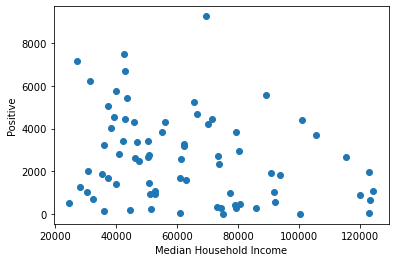

In [11]:
#Determine if there is a corrilation between median household income and positive cases. 
plt.scatter(merge_df.iloc[:,10],merge_df.iloc[:,3])
plt.xlabel('Median Household Income')
plt.ylabel('Positive')
plt.show()


The r-squared is : 0.92


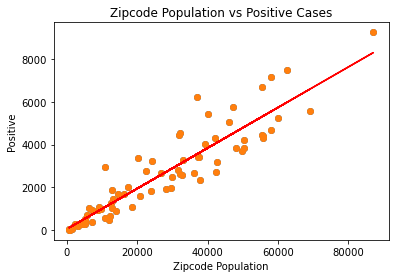

In [18]:

def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq




equation = linear_agression(merge_df["populationtotals_totpop_cy"], merge_df["Positive"])

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

plt.scatter(merge_df.iloc[:,2],merge_df.iloc[:,3])
plt.title('Zipcode Population vs Positive Cases')
plt.xlabel('Zipcode Population')
plt.ylabel('Positive')

plt.savefig("Pos_Pop.png")

In [39]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.27


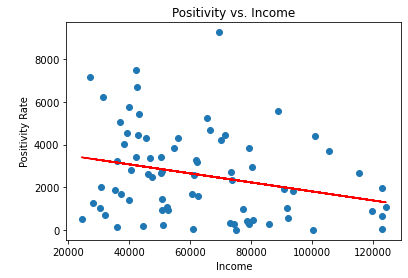

In [40]:
# Call an function #1
equation = linear_agression(merge_df["Median Household Income"], merge_df["Positive"])

# Call an function #2
annotate(equation, 0, 0)

# Set labels
plt.title("Positivity vs. Income")
plt.xlabel("Income")
plt.ylabel("Positivity Rate")

plt.show()

In [15]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : 0.36


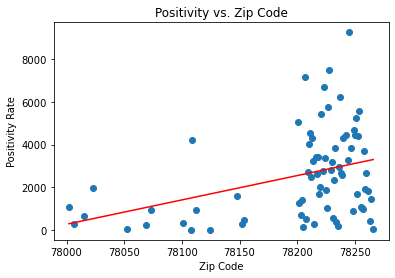

In [16]:
# Call an function #1
equation = linear_agression(merge_df["ZIP_CODE"], merge_df["Positive"])

# Call an function #2
#annotate(equation, 0, 0) (This is what was making the plot too large, the a axis coordinate needs to be in the range of the x axis scale (78000-78250ish))

# Set labels
plt.title("Positivity vs. Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Positivity Rate")

plt.show()

In [17]:
# import filters
majorityhispanic_filter = pd.read_csv('majorityhispanic_filter')
majoritynonhispanic_filter = pd.read_csv("majoritynonhispanic_filter")

#verify the data import, each filter should have different zipcodes
display(majorityhispanic_filter.head())
display(majoritynonhispanic_filter.head())

,Unnamed: 0,ZipInt
0,0,78002
1,4,78052
2,5,78069
3,6,78073
4,10,78112


,Unnamed: 0,ZipInt
0,1,78006
1,2,78015
2,3,78023
3,7,78101
4,8,78108


In [18]:
# Left merge onto the filter to split the income data
#merge left onto the filter to get data for only those zip codes
medianincome_majhf = pd.DataFrame
medianincome_majnhf = pd.DataFrame

medianincome_majhf = pd.merge(majorityhispanic_filter,merge_df, on="ZipInt",how="left")
medianincome_majnhf = pd.merge(majoritynonhispanic_filter,merge_df, on= 'ZipInt', how = 'left')

#drop outlier zipcode JBSA
medianincome_majnhf = medianincome_majnhf.drop(8)

#verify the filtering was successful each frame should hae different zipcodes
display(medianincome_majhf.head())
display(medianincome_majnhf.head())

,Unnamed: 0,ZipInt,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,Median Household Income
0,0,78002,1,78002,9061,1063,11816.362830,6,66.696309,0.427542,0.009546,52598.0
1,4,78052,7,78052,699,39,5555.555556,3,427.350427,0.260085,0.001147,60880.0
2,5,78069,12,78069,2290,225,9723.422645,0,0.000000,0.254859,0.002041,51316.0
3,6,78073,13,78073,7312,920,12273.212380,2,26.680896,0.580798,0.011685,50929.0
4,10,78112,17,78112,8791,945,10716.715810,6,68.042640,0.542672,0.011408,52761.0


,Unnamed: 0,ZipInt,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,Median Household Income
0,1,78006,2.0,78006.0,5243.0,278.0,4851.657941,3.0,52.356021,0.552725,0.005416,85813.0
1,2,78015,4.0,78015.0,12254.0,664.0,5167.315175,7.0,54.474708,0.278955,0.002312,123182.0
2,3,78023,5.0,78023.0,29569.0,1947.0,6588.163638,15.0,50.756268,0.886455,0.017922,122967.0
3,7,78101,14.0,78101.0,4485.0,311.0,6999.774927,1.0,22.507315,0.543172,0.006502,73030.0
4,8,78108,15.0,78108.0,880.0,14.0,1421.319797,1.0,101.522843,0.304887,0.000858,100271.0


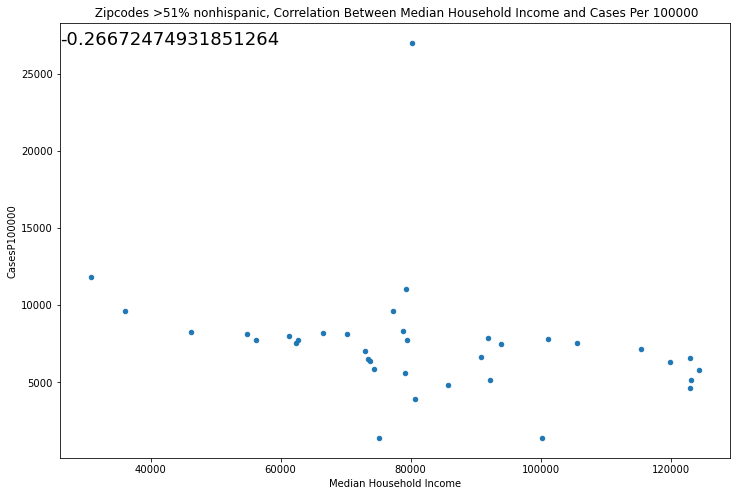

In [19]:
# Scatter plots for majority non hispanic zipcodes
xaxis =["Median Household Income"]
for element in xaxis:
    medianincome_majnhf.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f' Zipcodes >51% nonhispanic, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(medianincome_majnhf[element],
                                 medianincome_majnhf["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

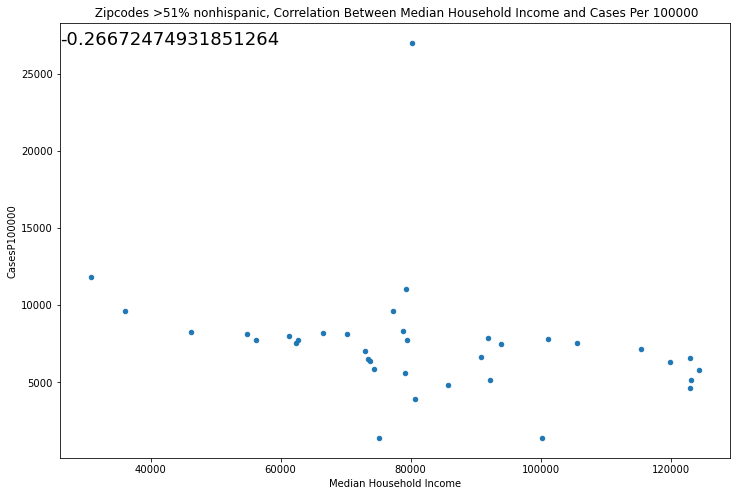

In [20]:
# Scatter plots for majority non hispanic zipcodes
xaxis =["Median Household Income"]
for element in xaxis:
    medianincome_majnhf.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f' Zipcodes >51% nonhispanic, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(medianincome_majnhf[element],
                                 medianincome_majnhf["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

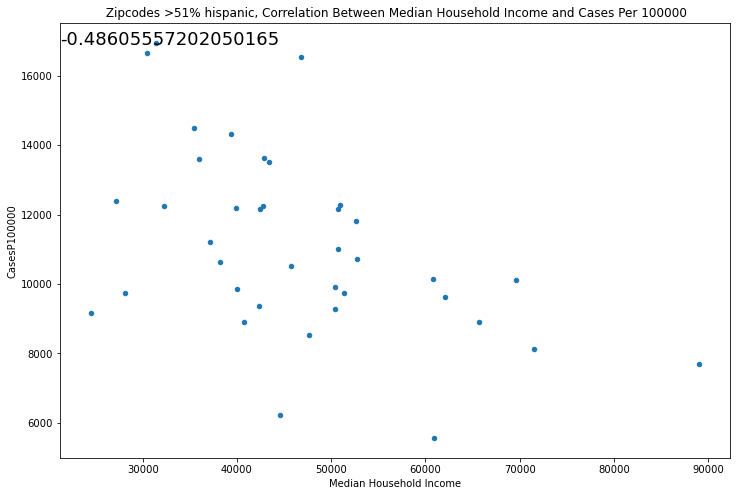

In [21]:
# Scatter plots for majority hispanic zipcodes
xaxis =["Median Household Income"]
for element in xaxis:
    medianincome_majhf.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f' Zipcodes >51% hispanic, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(medianincome_majhf[element],
                                 medianincome_majhf["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

In [22]:
#determine median value for median income
merge_df["Median Household Income"].median()

60787.0

In [23]:
#  Create filters to split zipcodes above and below median income
belowmedian = pd.DataFrame
abovemedian = pd.DataFrame

belowmedian = merge_df.copy()[merge_df["Median Household Income"] <60787.0]
abovemedian = merge_df.copy()[merge_df["Median Household Income"]>= 60787.0]

#verify the operation, the datframes should have different zipcodes
display(belowmedian.head())
display(abovemedian.head())

,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,Median Household Income
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546,52598.0
5,12,78069,2290,225,9723.422645,78069,0,0.000000,0.254859,0.002041,51316.0
6,13,78073,7312,920,12273.212380,78073,2,26.680896,0.580798,0.011685,50929.0
10,17,78112,8791,945,10716.715810,78112,6,68.042640,0.542672,0.011408,52761.0
16,27,78201,45977,5058,11207.374090,78201,33,73.120472,0.247549,0.001721,37183.0


,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,Median Household Income
1,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416,85813.0
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312,123182.0
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922,122967.0
4,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147,60880.0
7,14,78101,4485,311,6999.774927,78101,1,22.507315,0.543172,0.006502,73030.0


In [24]:
#Import age data to use with income filters
age_percentage = pd.read_csv(r'census_age_data')

#merge left onto the filter to get data for only those zip codes
age_belowmedian = pd.DataFrame
age_abovemedian = pd.DataFrame

age_belowmedian = pd.merge(belowmedian,age_percentage, on="ZipInt",how="left")
age_abovemedian = pd.merge(abovemedian,age_percentage, on= 'ZipInt', how = 'left')

#verify results
display(age_abovemedian.head())
display(age_belowmedian.head())

,OBJECTID_x,ZIP_CODE_x,populationtotals_totpop_cy_x,Positive_x,CasesP100000_x,ZipInt,ActiveCases_x,ActiveCaseRate_x,SHAPE_Length_x,SHAPE_Area_x,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
0,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416,...,1.672398,1.583648,2.751276,3.272687,1.519858,1.808298,0.812625,0.826492,1.020635,1.985800
1,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312,...,2.725950,1.195370,2.694327,2.523560,1.568528,2.200999,1.397761,0.676744,0.094871,0.373158
2,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922,...,1.466977,2.184520,1.533948,1.671078,0.880186,1.052397,0.912077,0.956724,0.408202,0.424148
3,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147,...,0.723888,2.038706,2.422810,2.792141,1.270498,1.152312,0.605702,0.679569,1.388684,1.403457
4,14,78101,4485,311,6999.774927,78101,1,22.507315,0.543172,0.006502,...,1.051817,2.397525,3.712297,2.119103,0.835267,1.283836,0.355762,1.206497,0.556845,0.959010


,OBJECTID_x,ZIP_CODE_x,populationtotals_totpop_cy_x,Positive_x,CasesP100000_x,ZipInt,ActiveCases_x,ActiveCaseRate_x,SHAPE_Length_x,SHAPE_Area_x,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546,...,0.292697,0.892726,1.726914,2.122055,1.756183,0.790282,0.278062,0.775648,1.551295,0.643934
1,12,78069,2290,225,9723.422645,78069,0,0.000000,0.254859,0.002041,...,0.768602,1.815209,2.207686,1.013900,0.506950,0.981194,0.523303,0.441537,0.049060,0.098119
2,13,78073,7312,920,12273.212380,78073,2,26.680896,0.580798,0.011685,...,0.745921,1.095571,1.818182,0.932401,0.664336,0.745921,0.559441,0.874126,0.139860,0.128205
3,17,78112,8791,945,10716.715810,78112,6,68.042640,0.542672,0.011408,...,1.160497,1.160497,1.056052,0.905187,0.823953,0.696298,0.371359,0.928397,0.000000,0.081235
4,27,78201,45977,5058,11207.374090,78201,33,73.120472,0.247549,0.001721,...,1.063434,1.487566,1.499979,1.948939,1.365498,1.828940,0.614474,0.899988,0.494476,1.446187


C:\Users\court\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


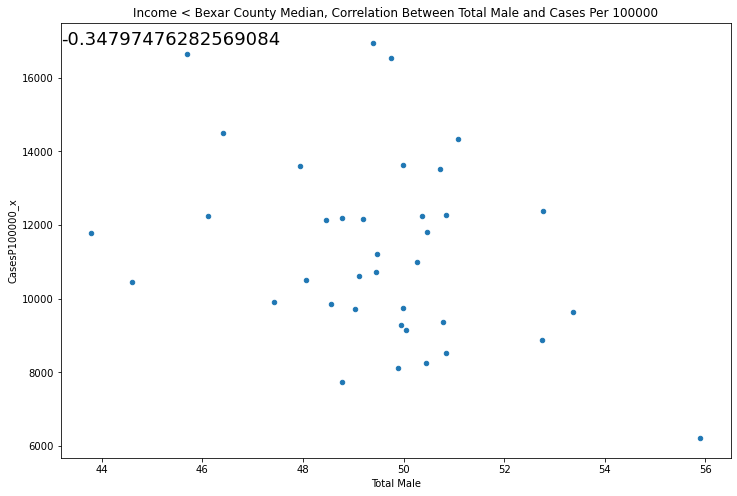

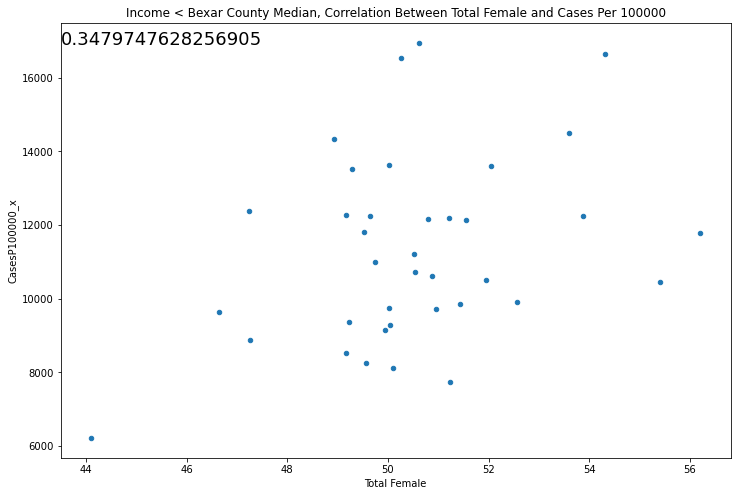

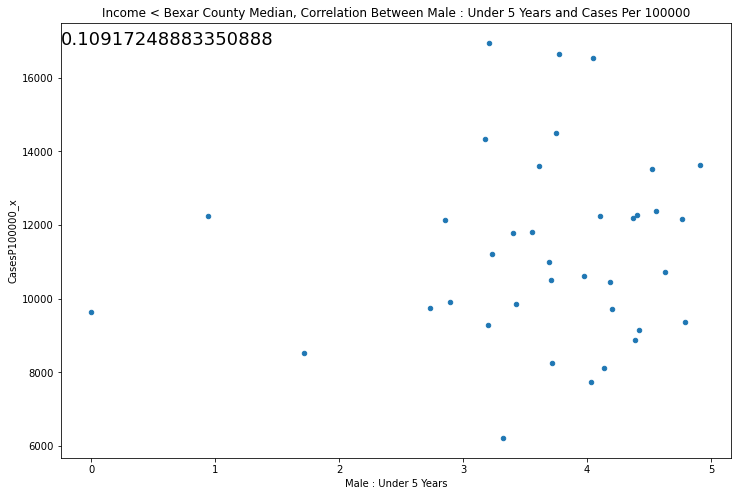

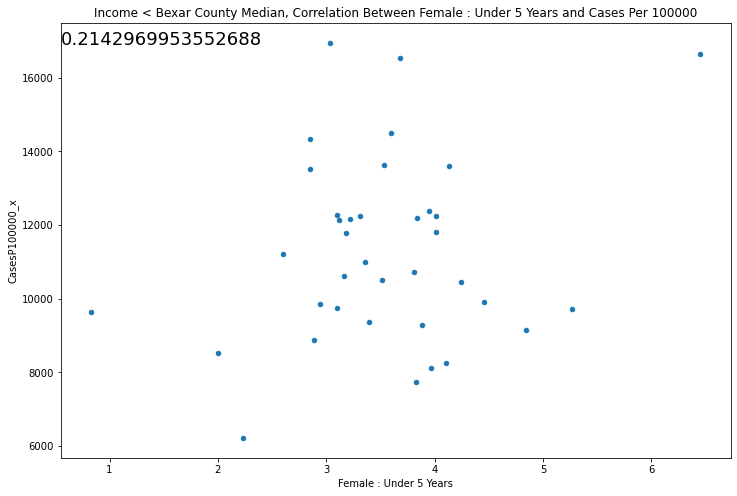

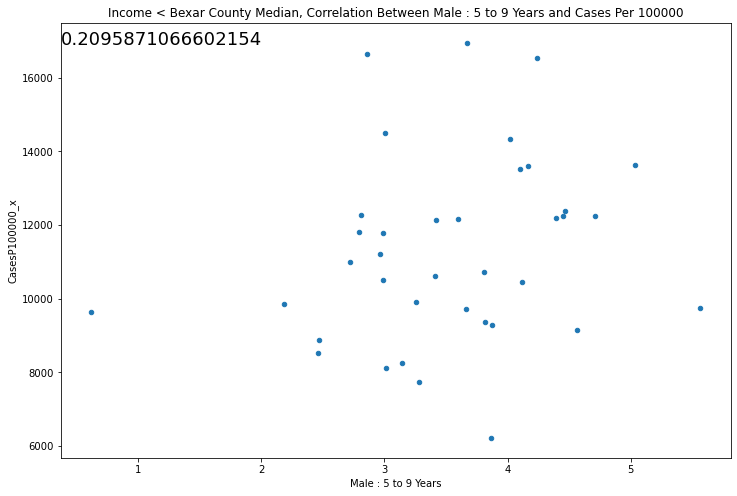

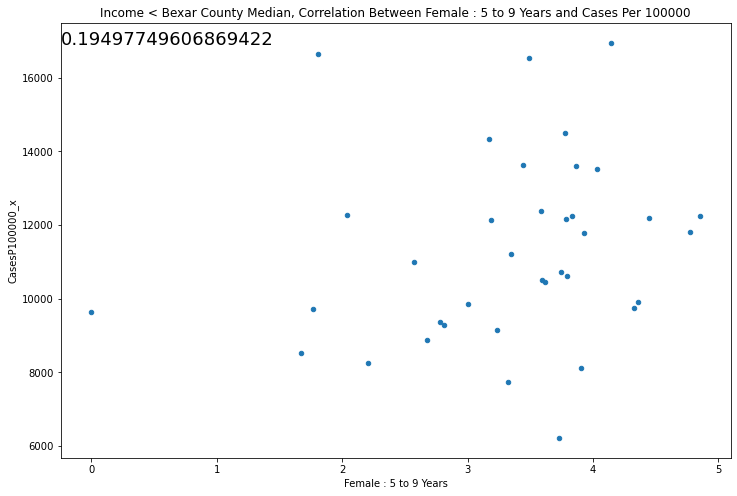

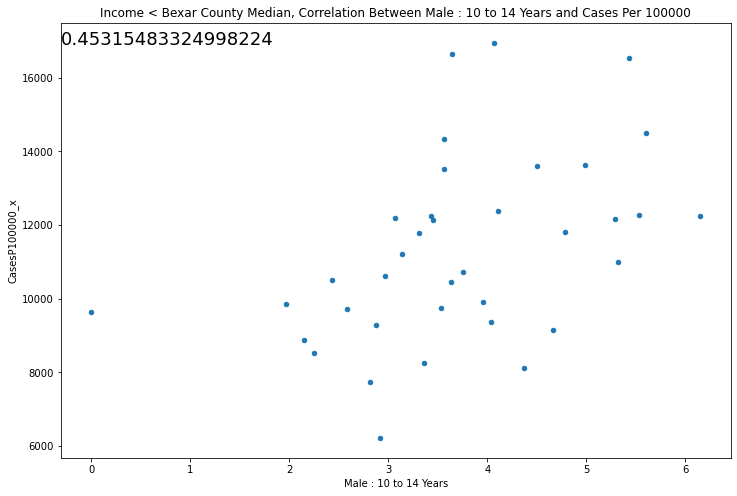

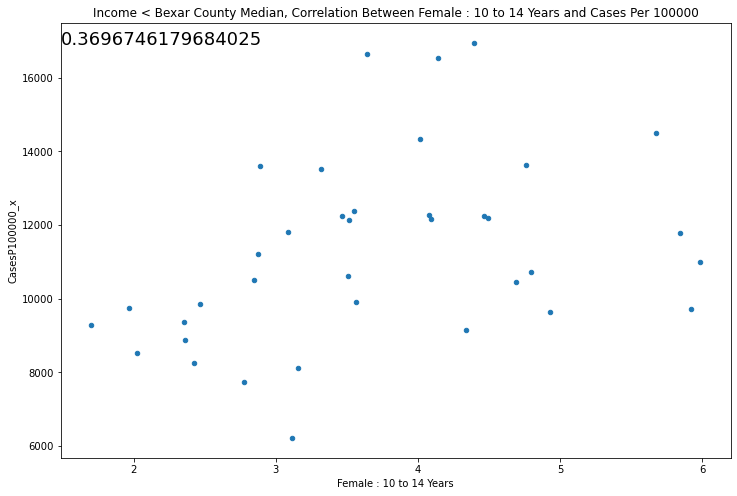

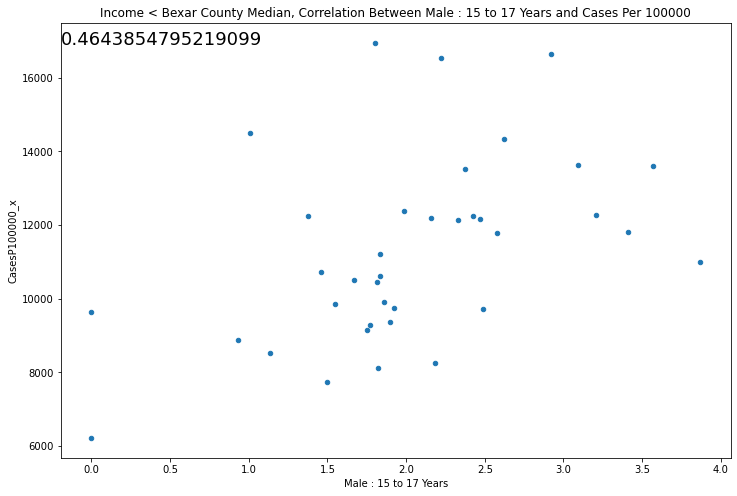

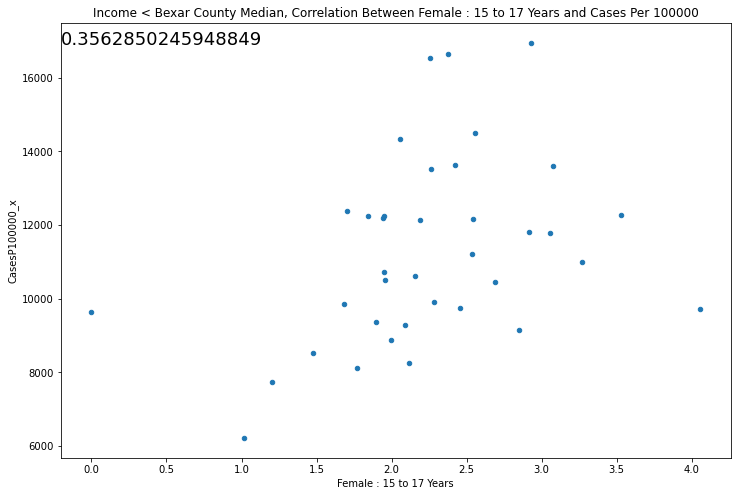

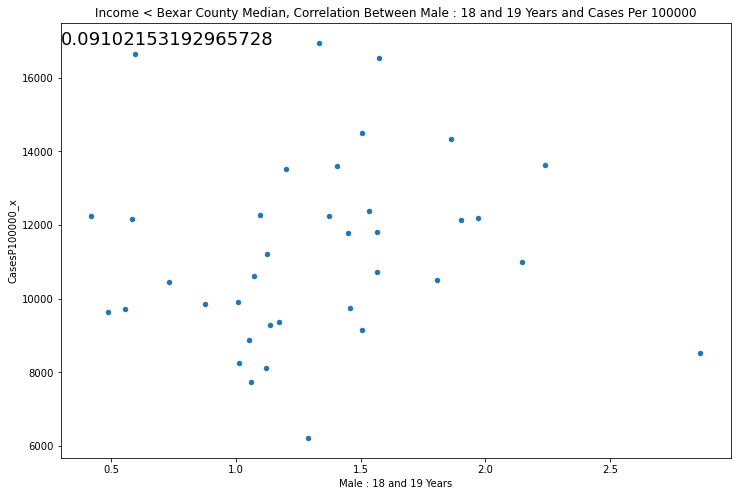

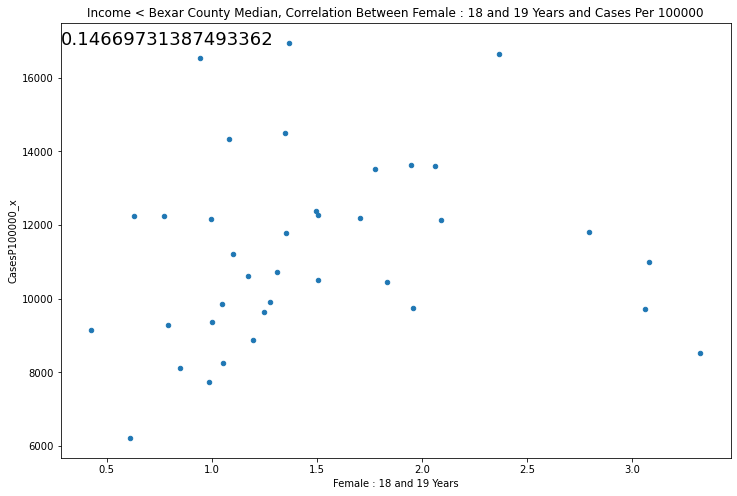

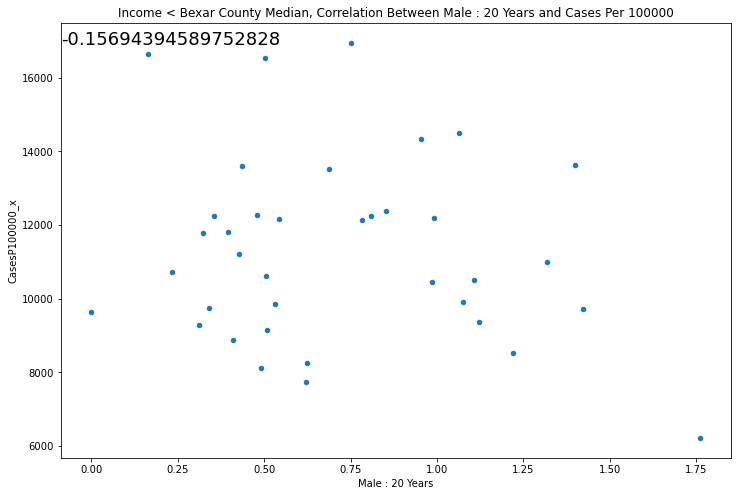

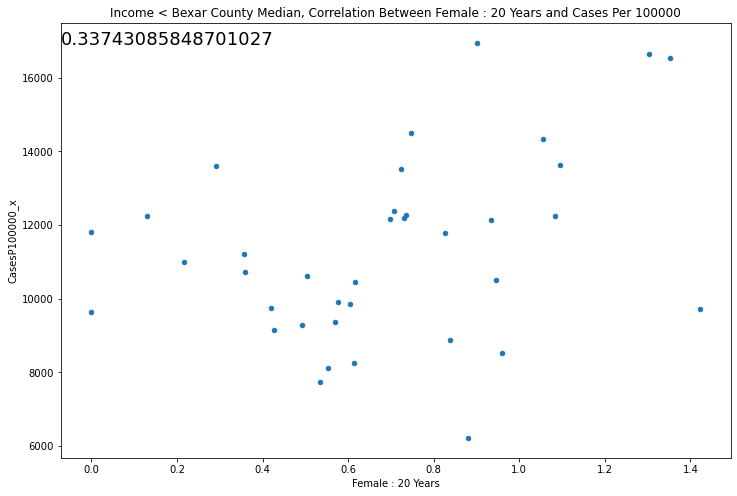

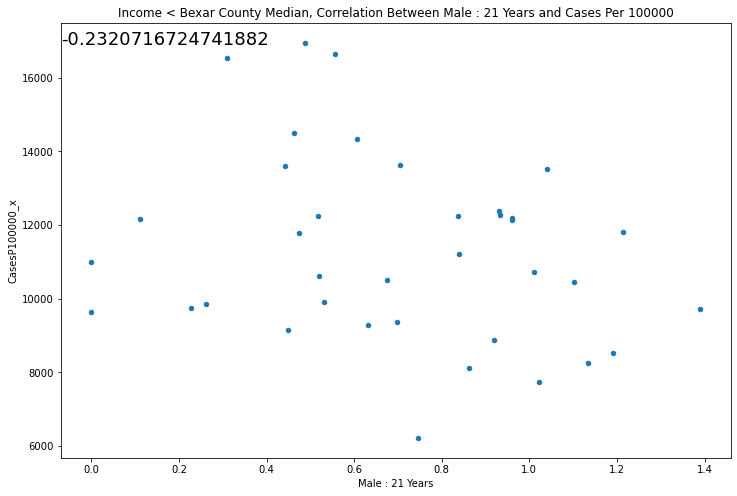

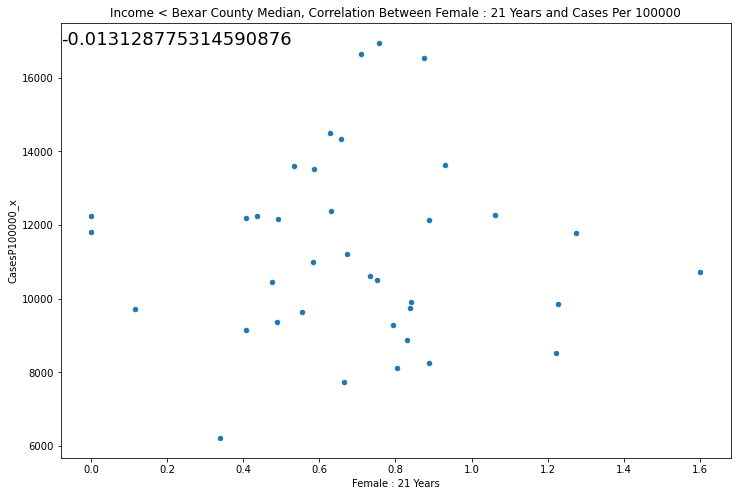

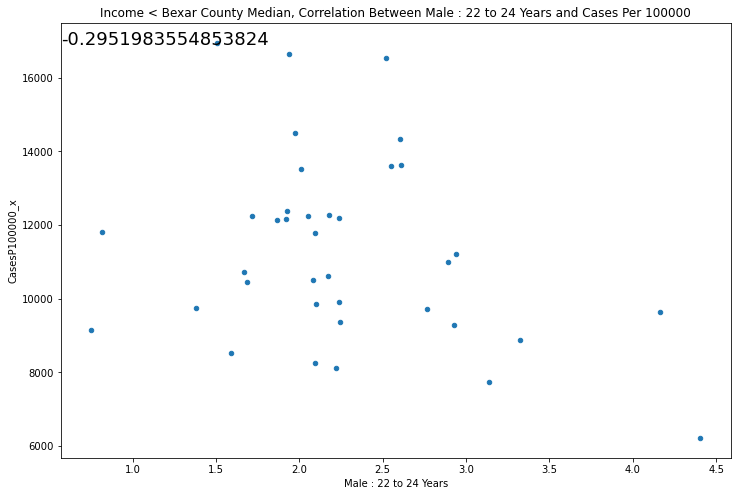

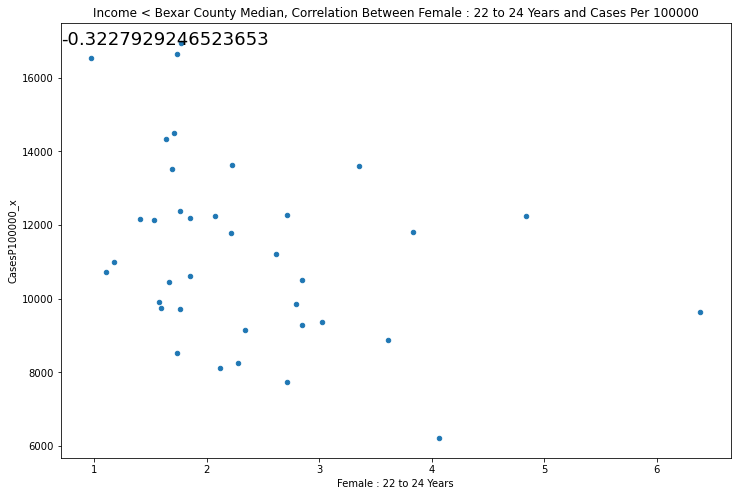

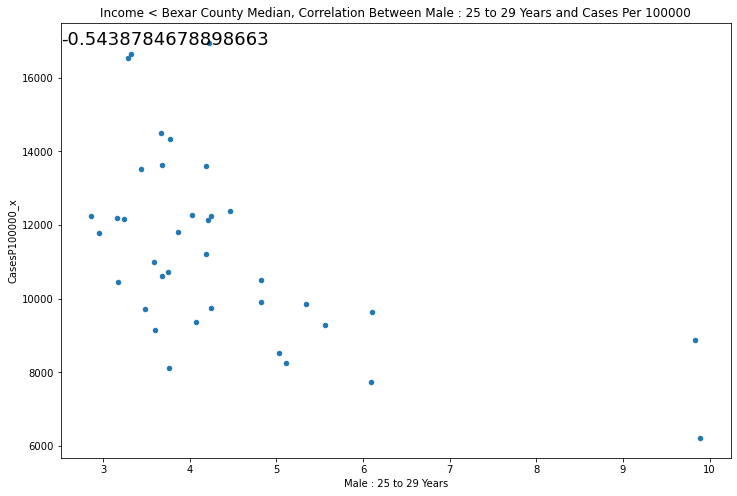

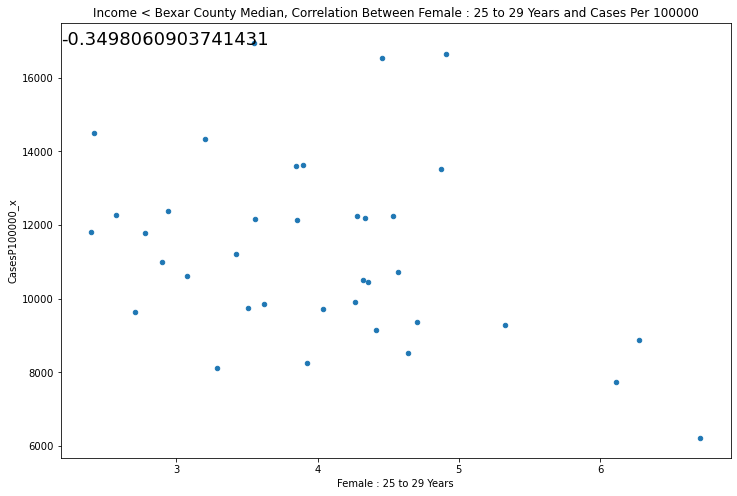

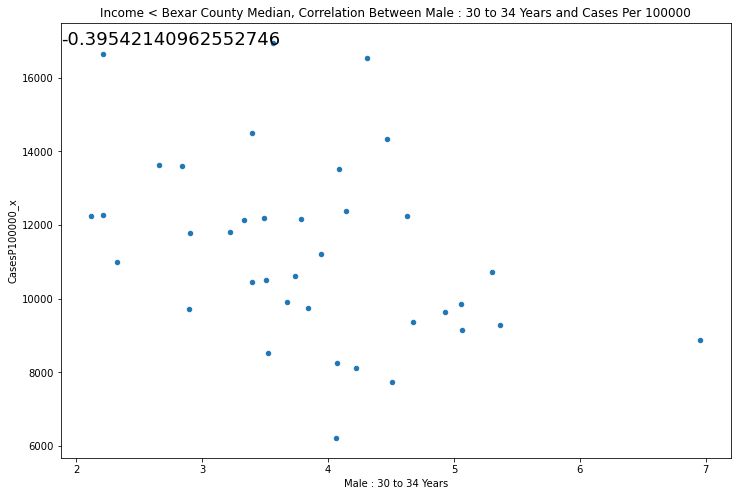

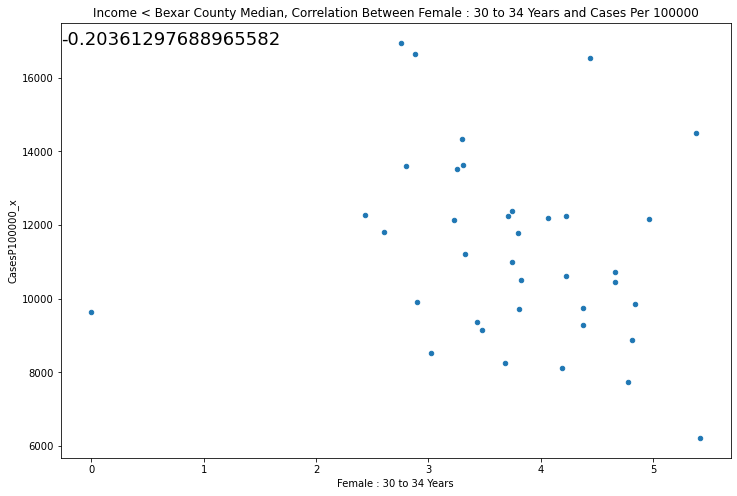

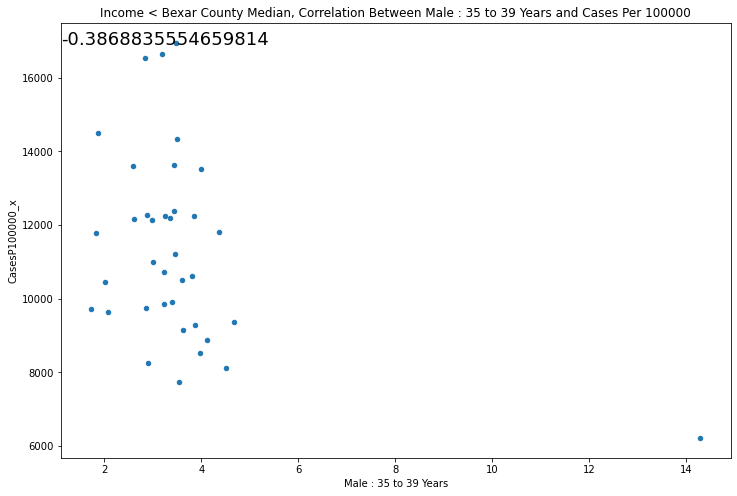

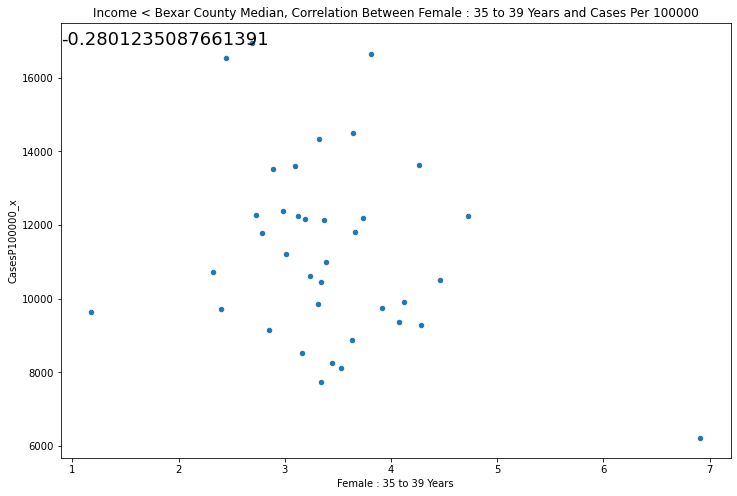

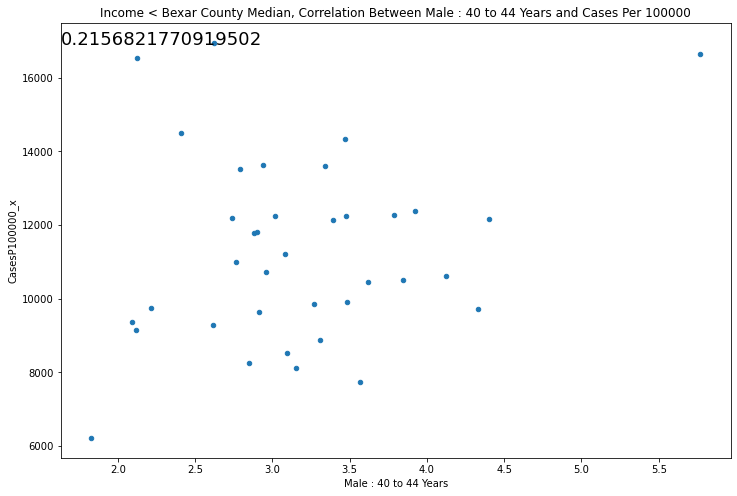

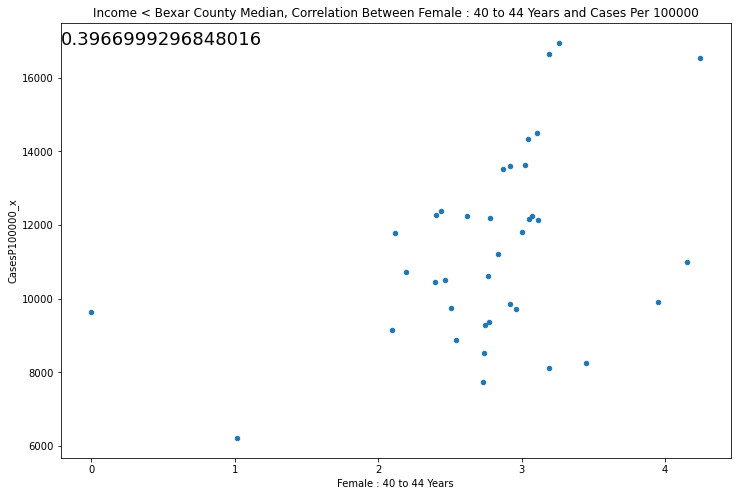

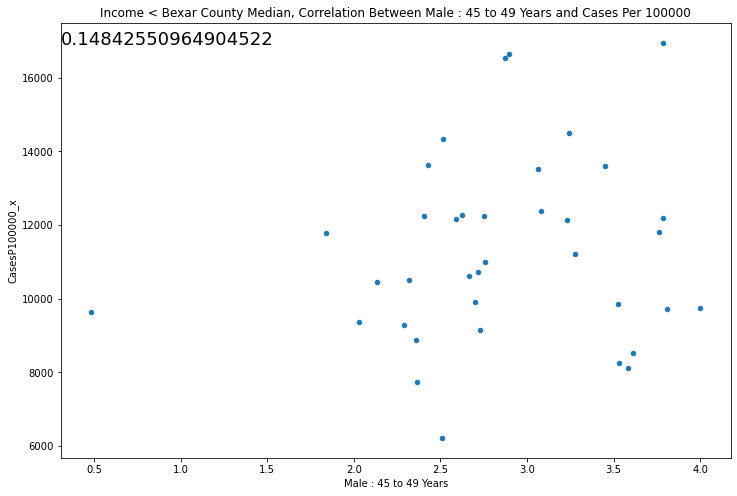

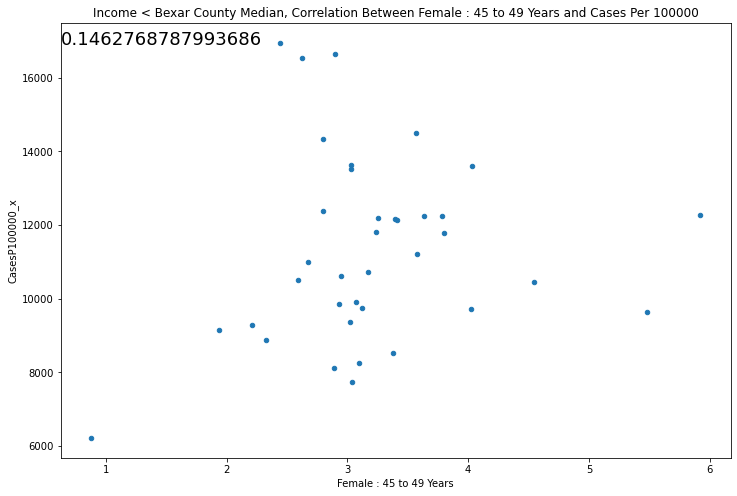

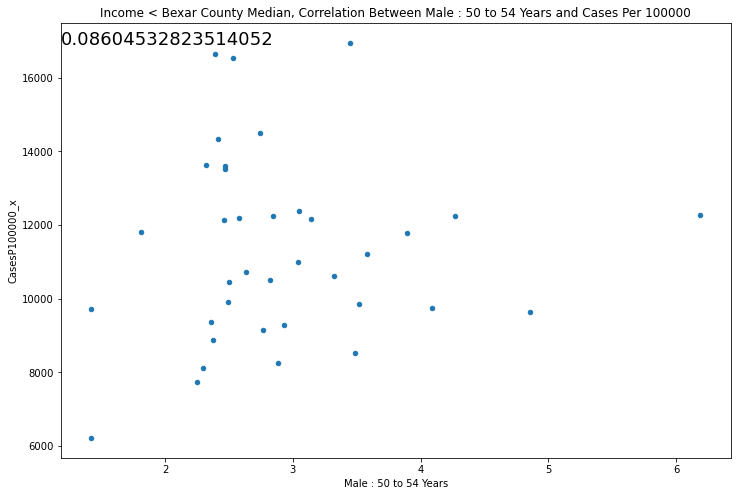

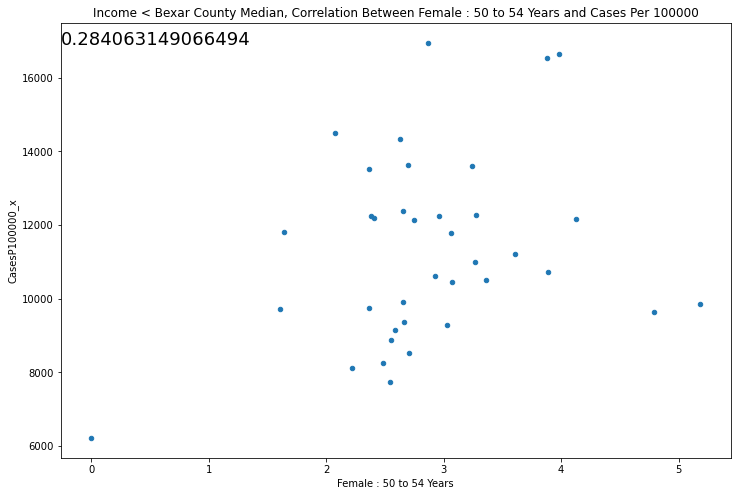

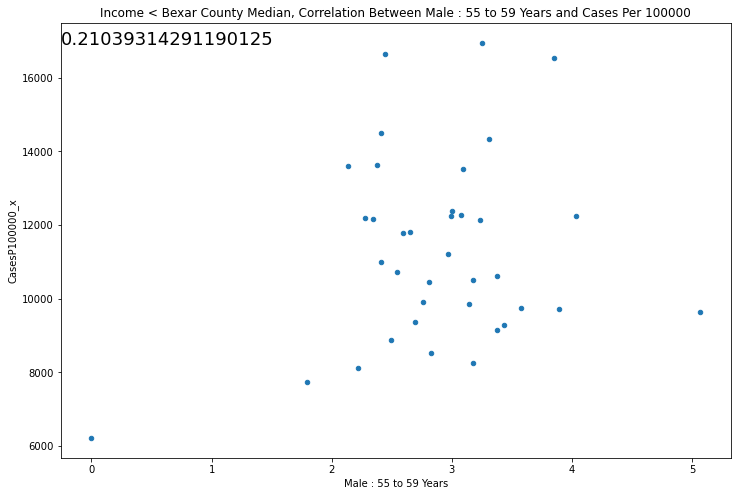

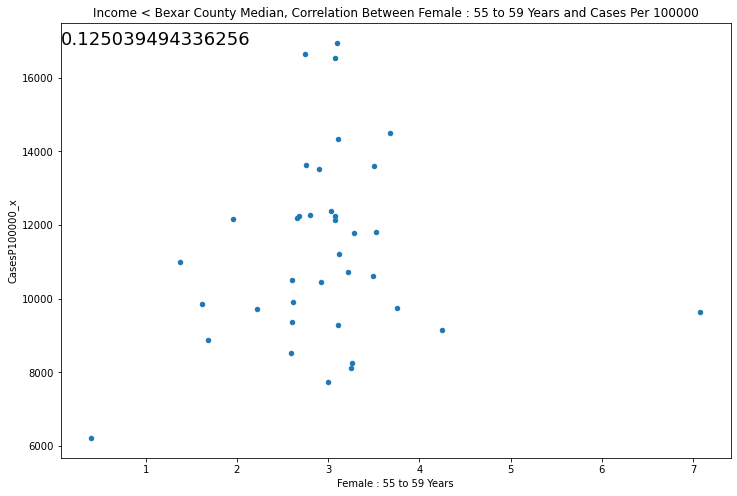

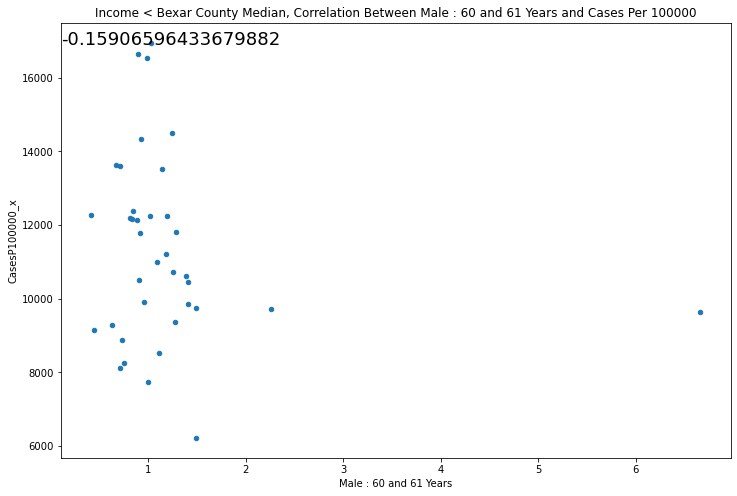

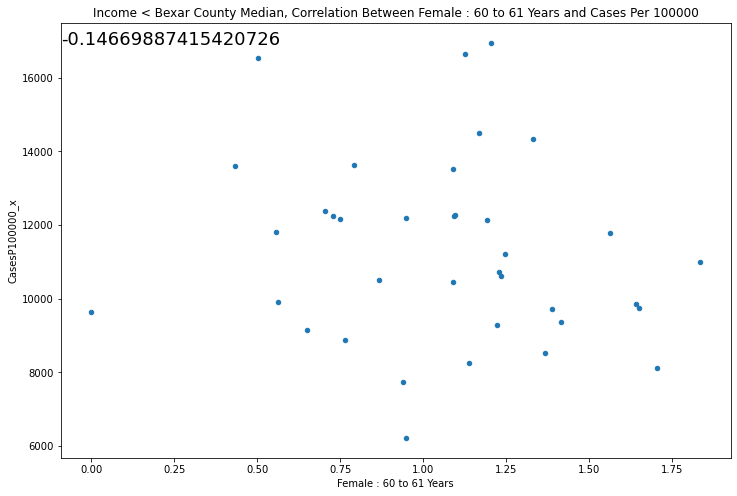

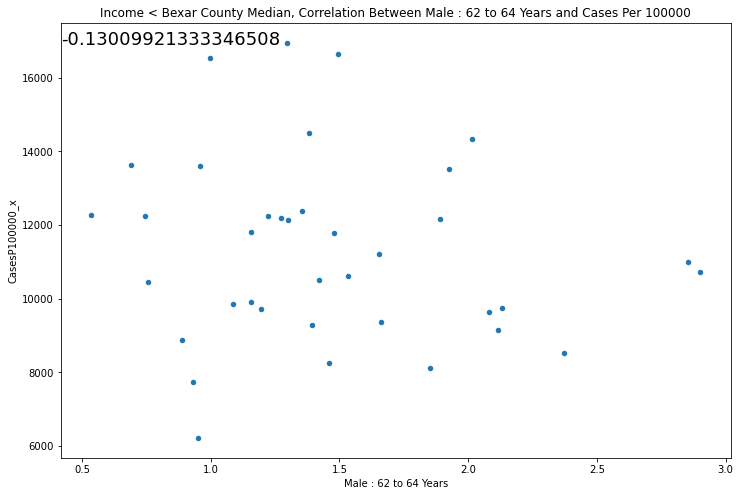

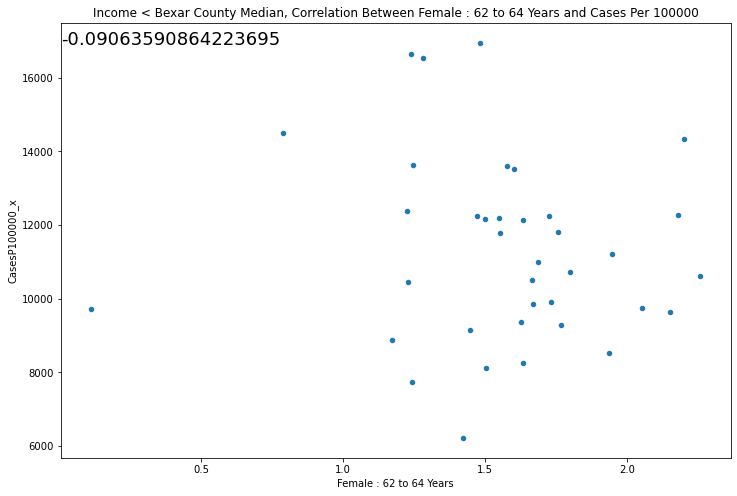

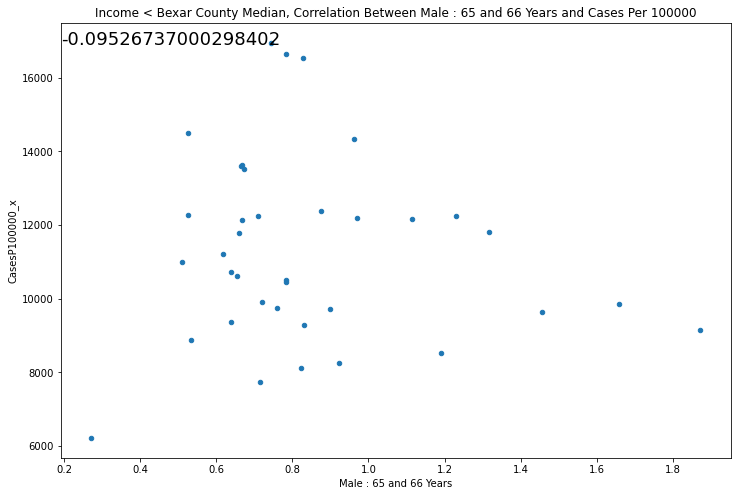

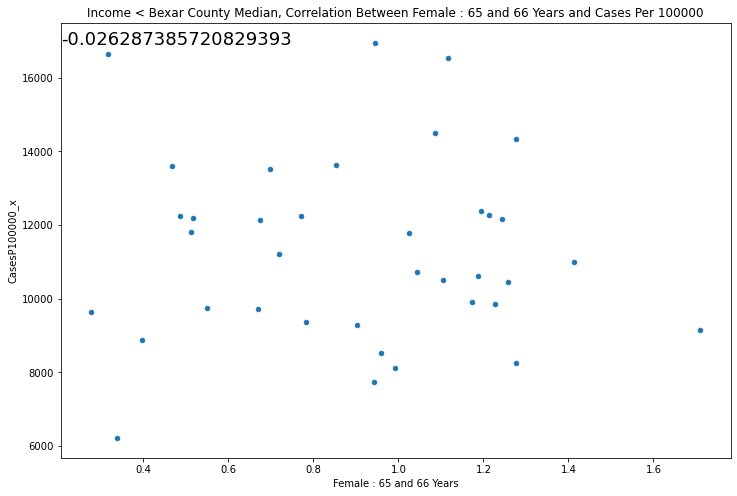

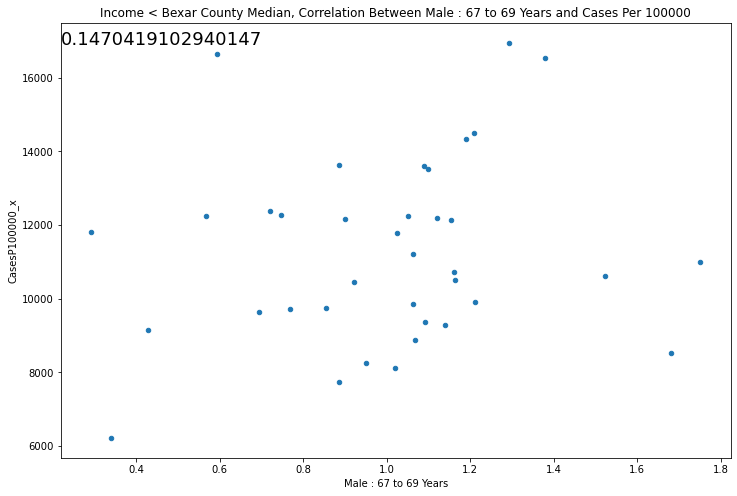

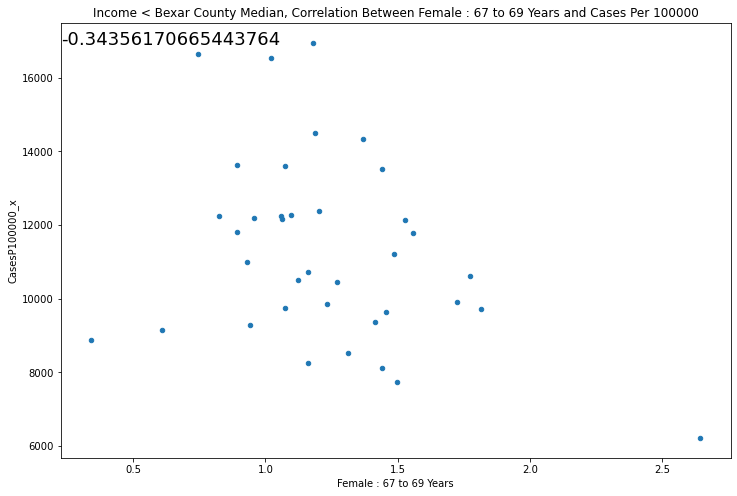

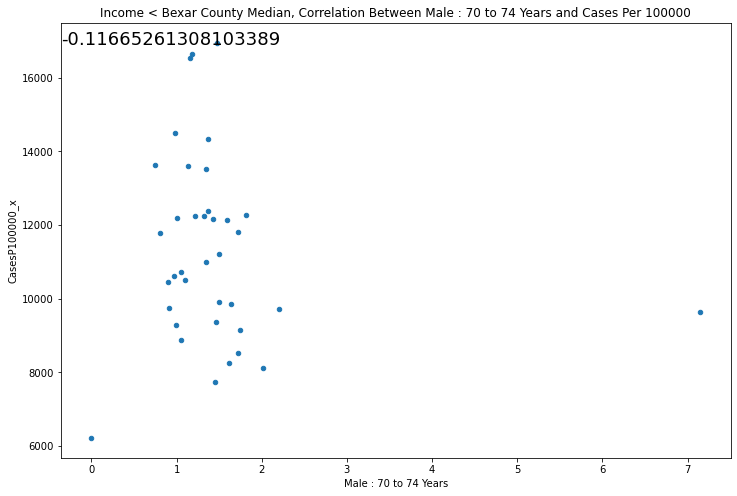

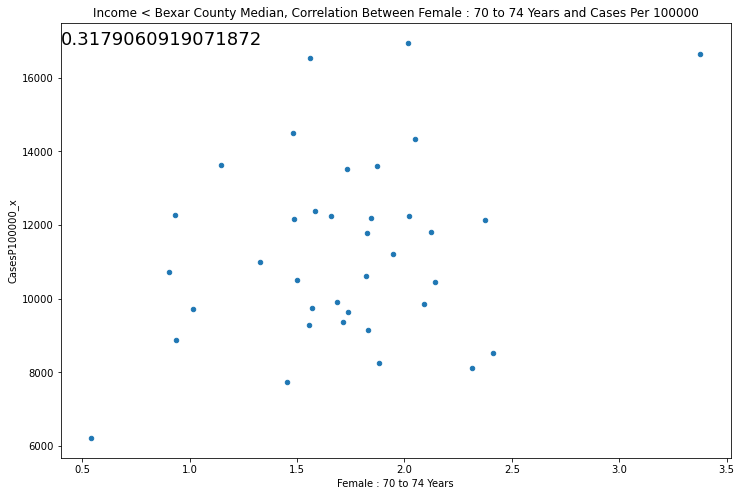

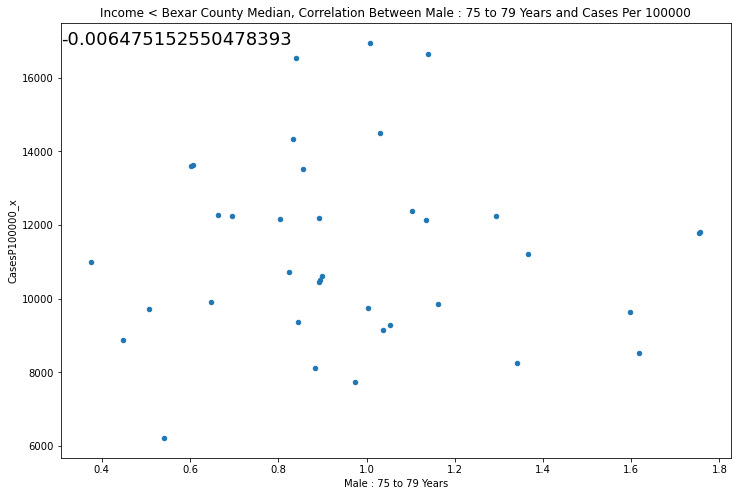

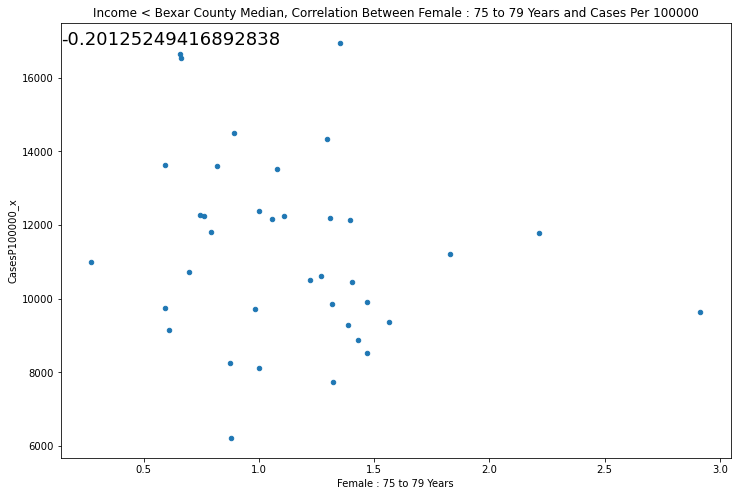

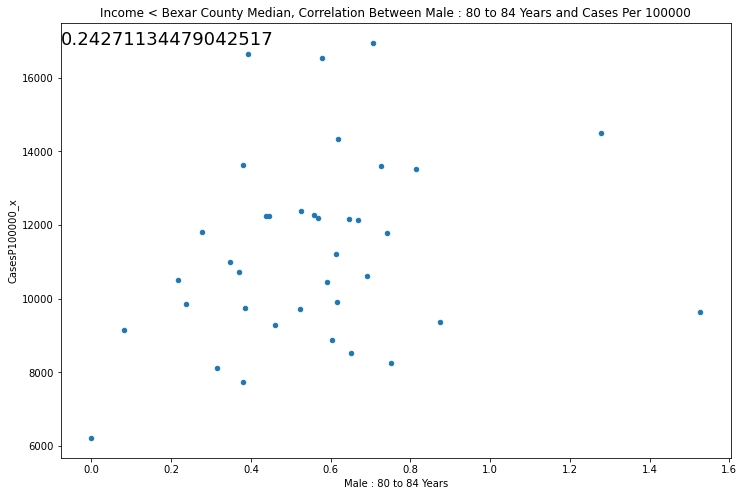

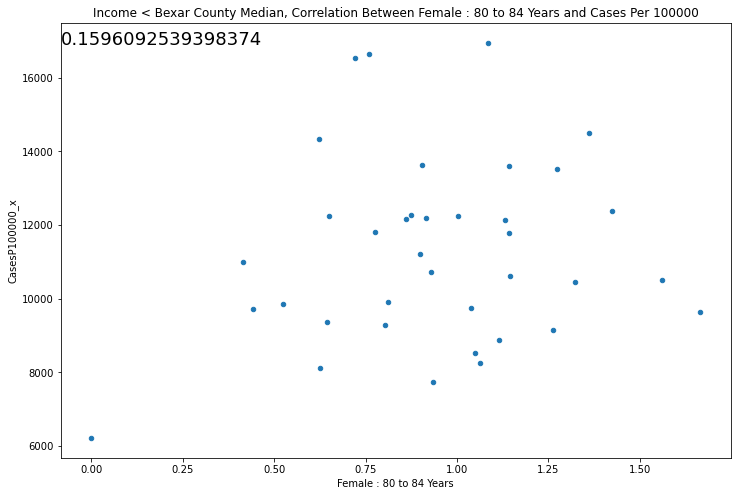

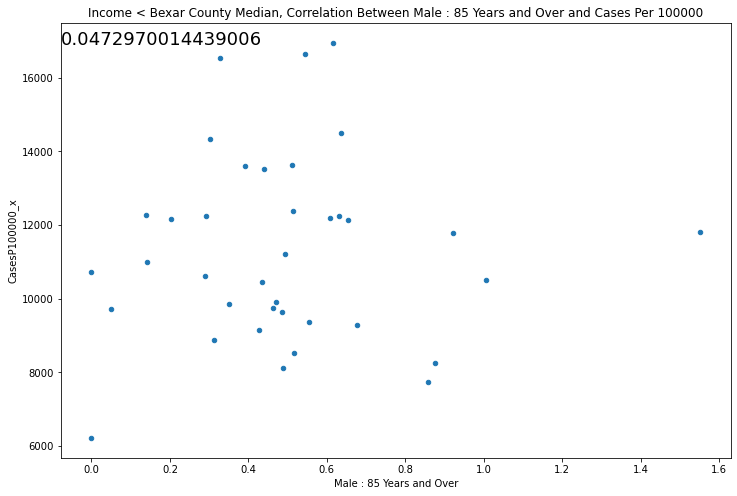

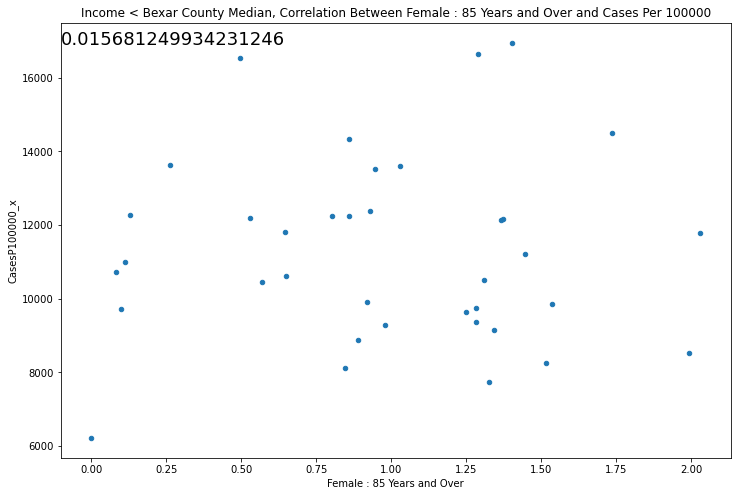

In [25]:
#Scatter plots for below median income
age_list =["Total Male", "Total Female", "Male : Under 5 Years", "Female : Under 5 Years", "Male : 5 to 9 Years", "Female : 5 to 9 Years",
            "Male : 10 to 14 Years", "Female : 10 to 14 Years", "Male : 15 to 17 Years", "Female : 15 to 17 Years", "Male : 18 and 19 Years", "Female : 18 and 19 Years",
            "Male : 20 Years", "Female : 20 Years", "Male : 21 Years", "Female : 21 Years", "Male : 22 to 24 Years",
            "Female : 22 to 24 Years", "Male : 25 to 29 Years", "Female : 25 to 29 Years", "Male : 30 to 34 Years",
            "Female : 30 to 34 Years", "Male : 35 to 39 Years", "Female : 35 to 39 Years", "Male : 40 to 44 Years",
            "Female : 40 to 44 Years", "Male : 45 to 49 Years", "Female : 45 to 49 Years", "Male : 50 to 54 Years",
            "Female : 50 to 54 Years", "Male : 55 to 59 Years", "Female : 55 to 59 Years", "Male : 60 and 61 Years",
             "Female : 60 to 61 Years", "Male : 62 to 64 Years", "Female : 62 to 64 Years", "Male : 65 and 66 Years",
            "Female : 65 and 66 Years", "Male : 67 to 69 Years", "Female : 67 to 69 Years", "Male : 70 to 74 Years",
            "Female : 70 to 74 Years", "Male : 75 to 79 Years", "Female : 75 to 79 Years", "Male : 80 to 84 Years",
            "Female : 80 to 84 Years", "Male : 85 Years and Over", "Female : 85 Years and Over"]

for element in age_list:
    age_belowmedian.plot.scatter(element,"CasesP100000_x", figsize = (12,8),title=f'Income < Bexar County Median, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(age_belowmedian[element],
                                 age_belowmedian["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

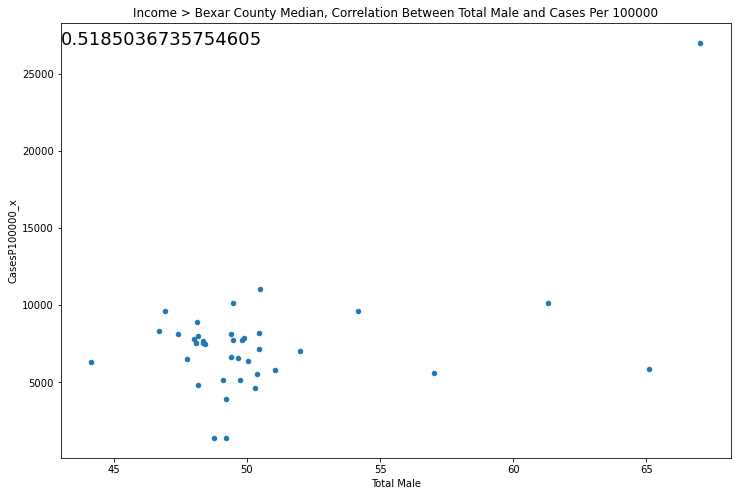

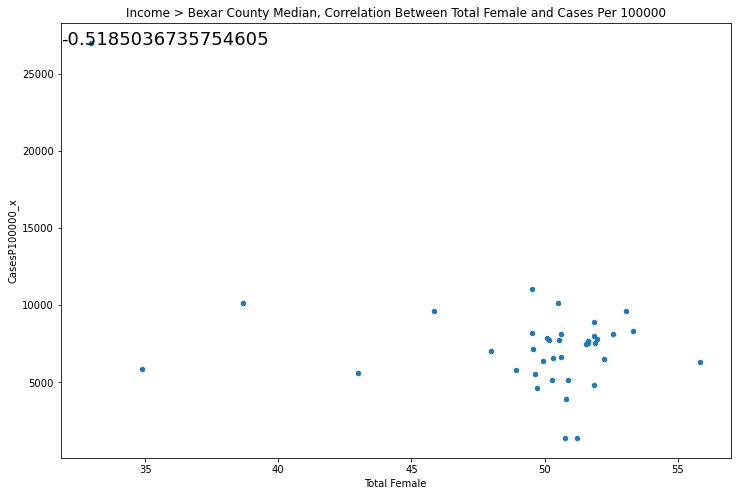

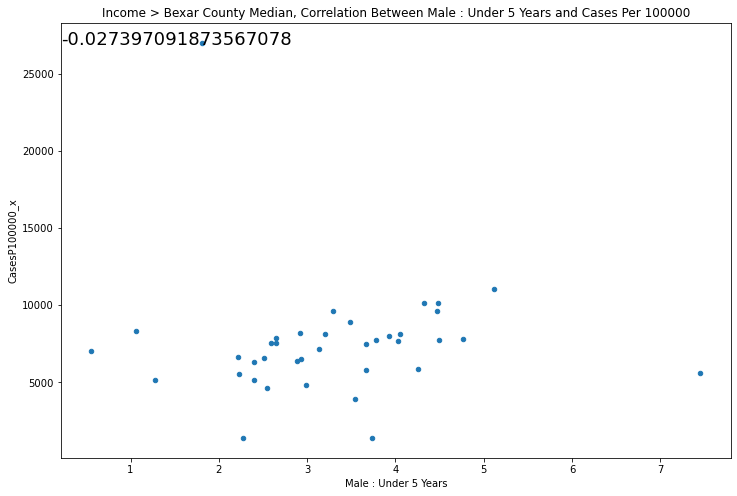

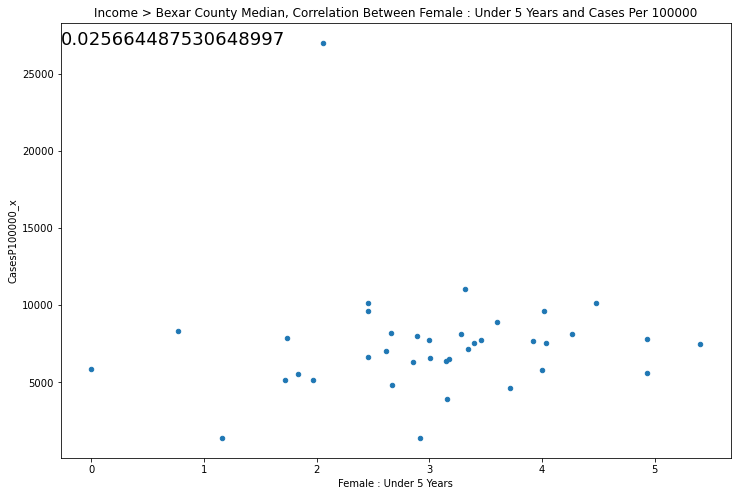

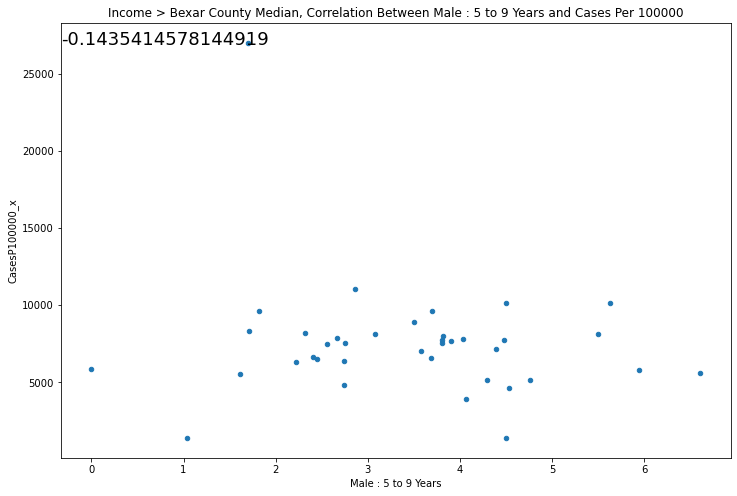

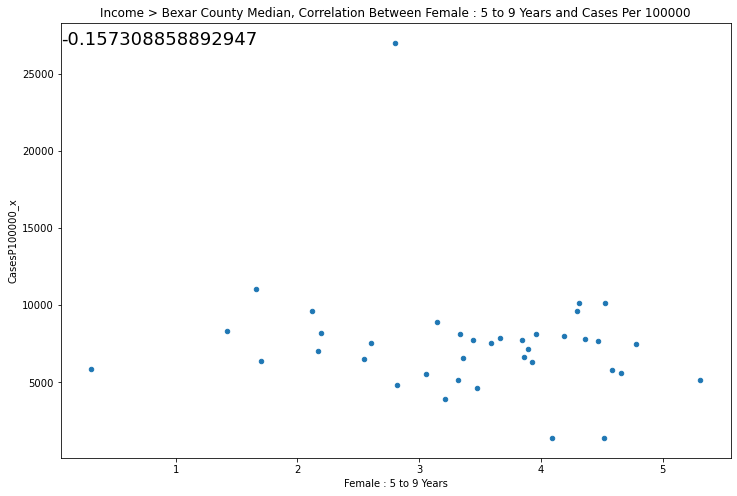

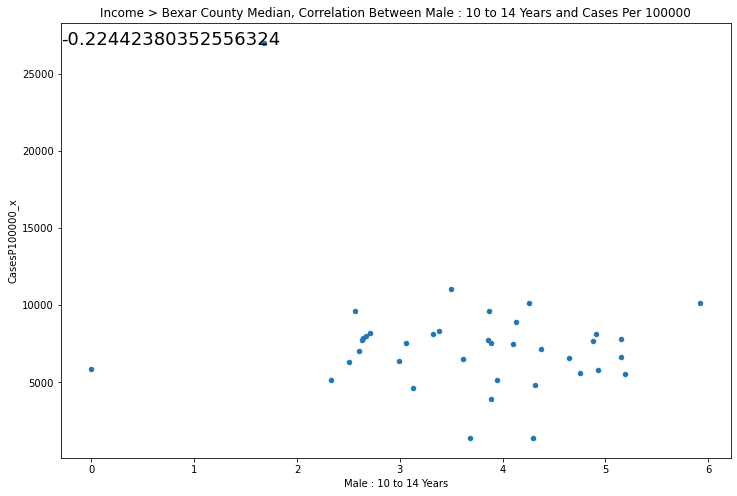

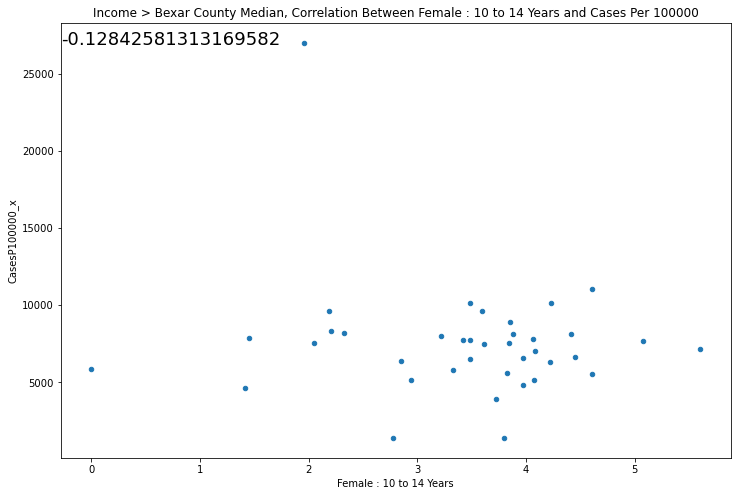

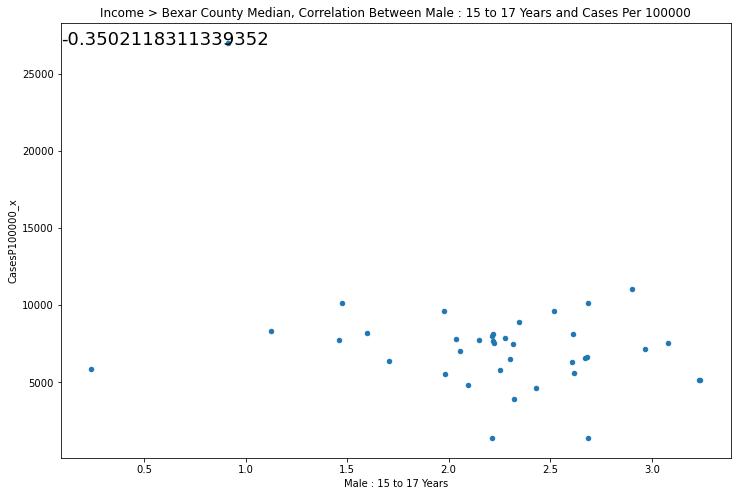

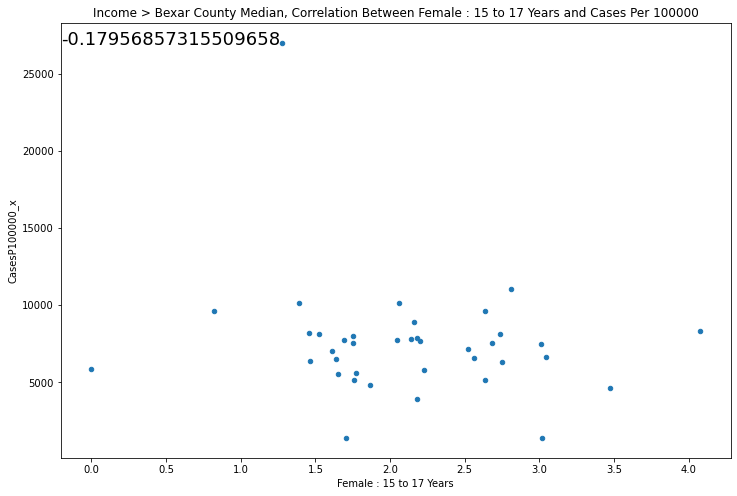

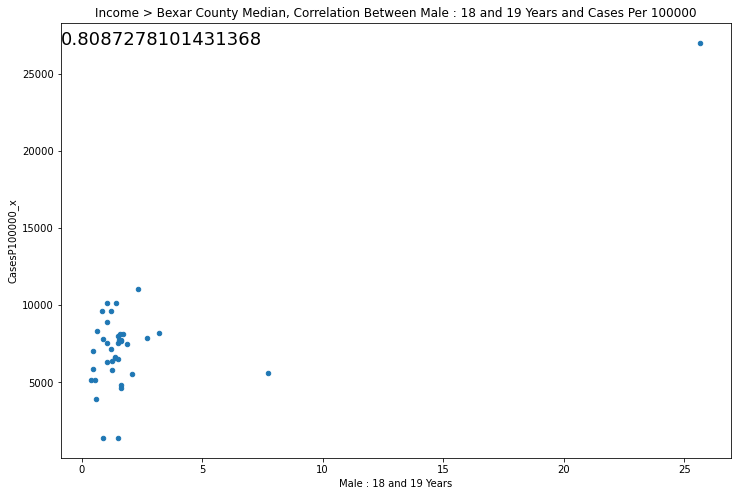

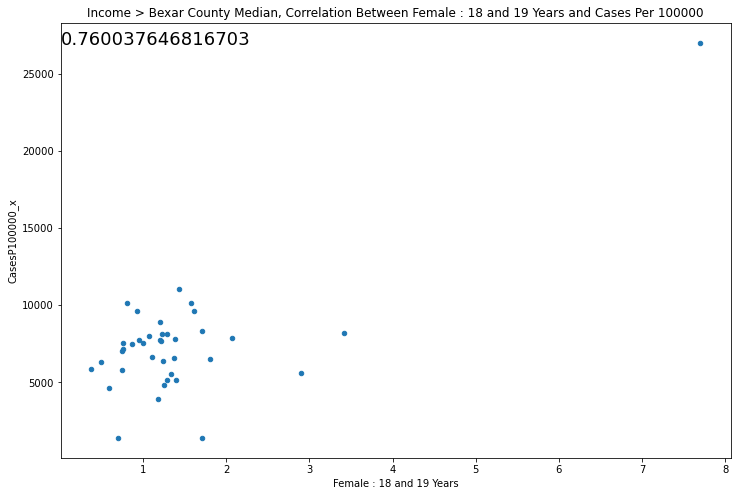

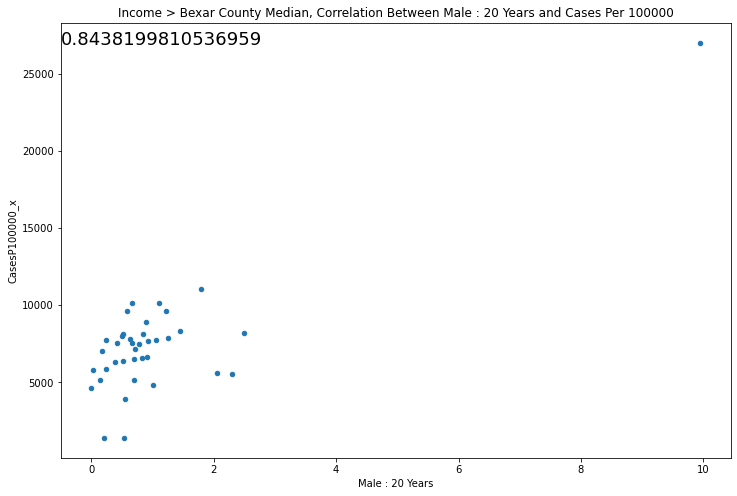

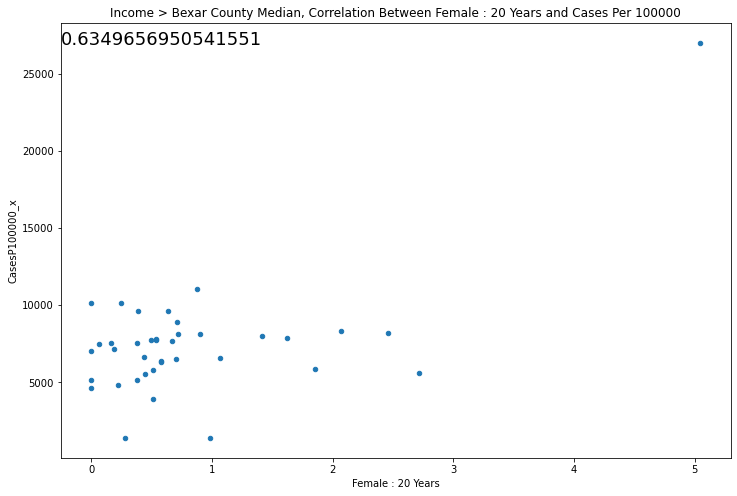

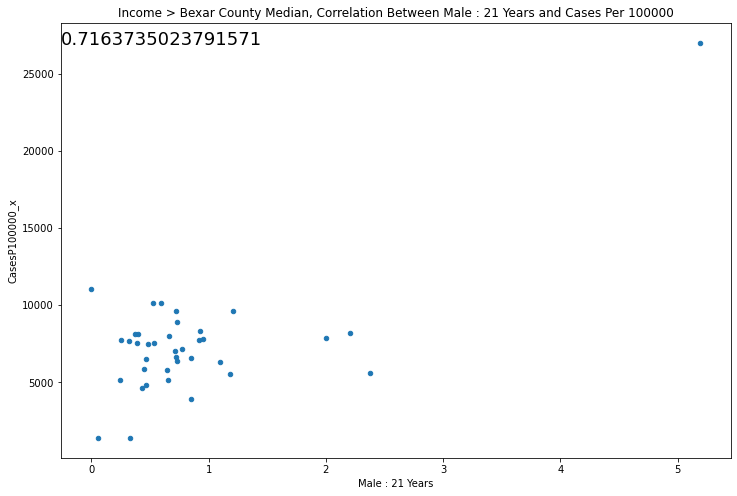

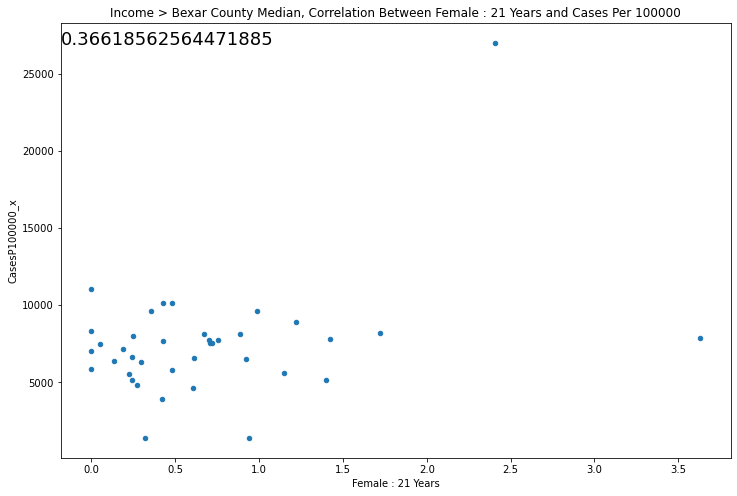

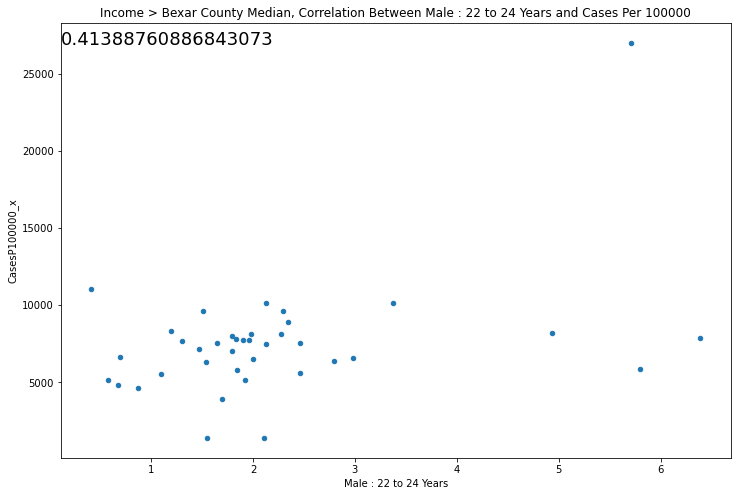

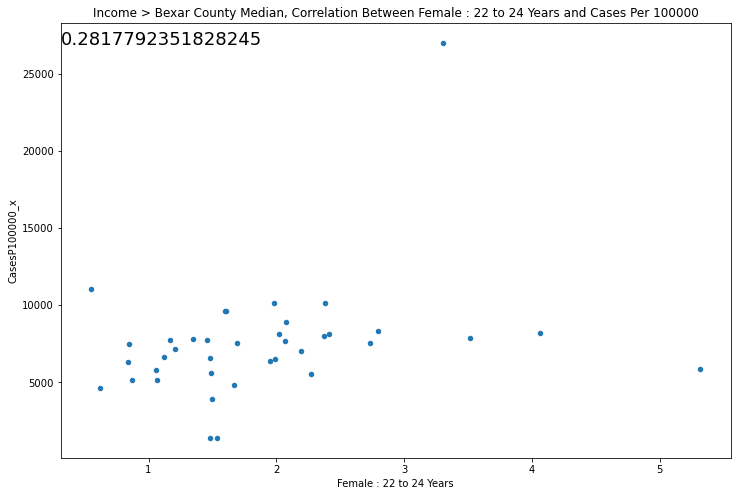

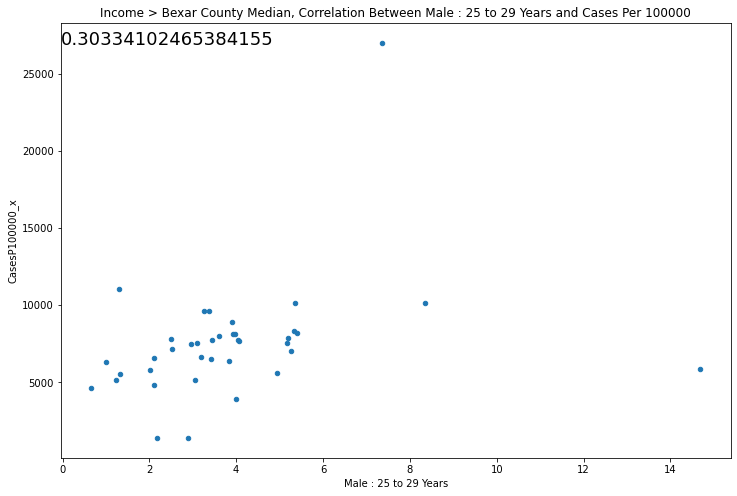

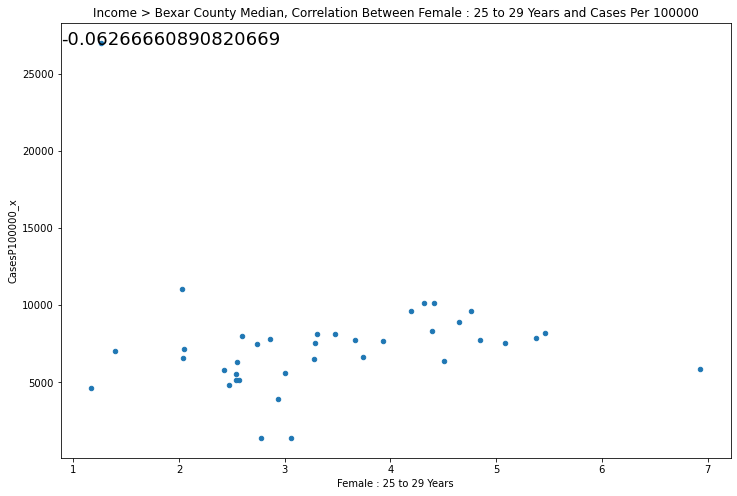

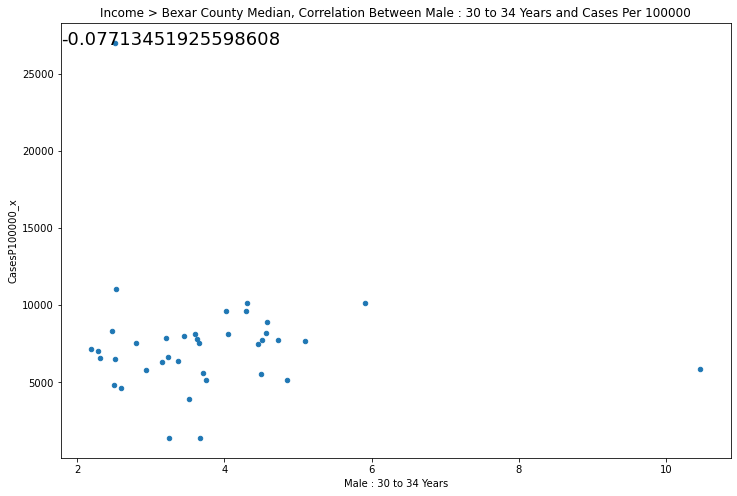

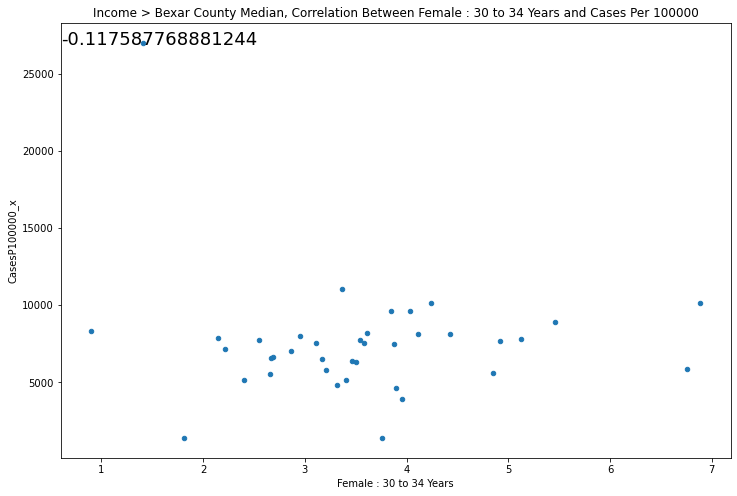

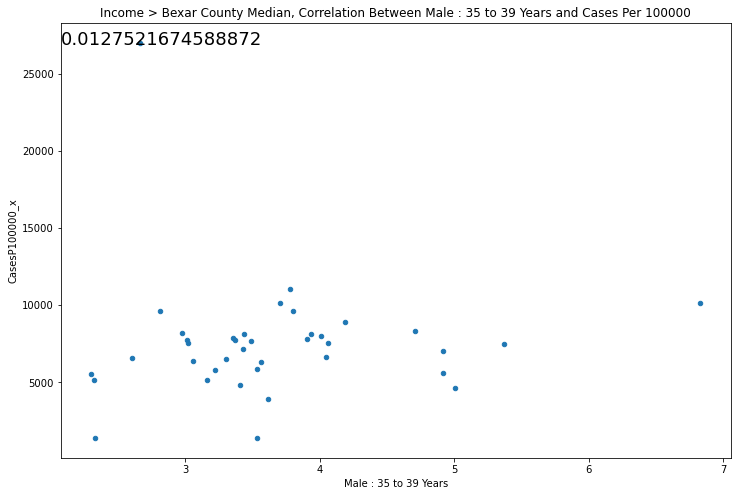

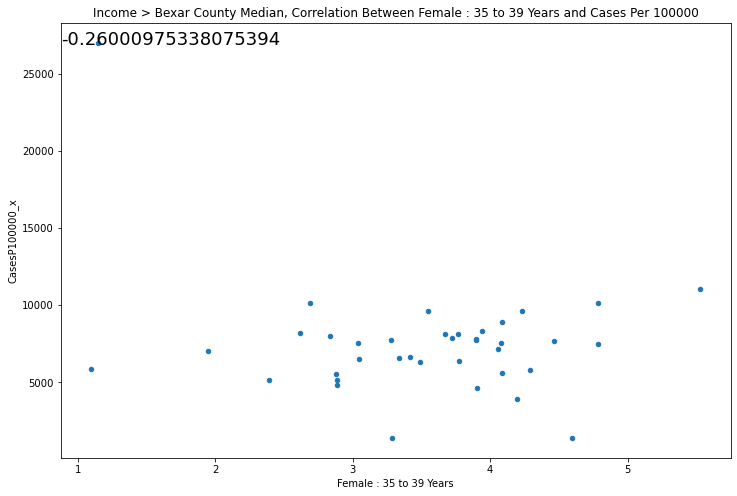

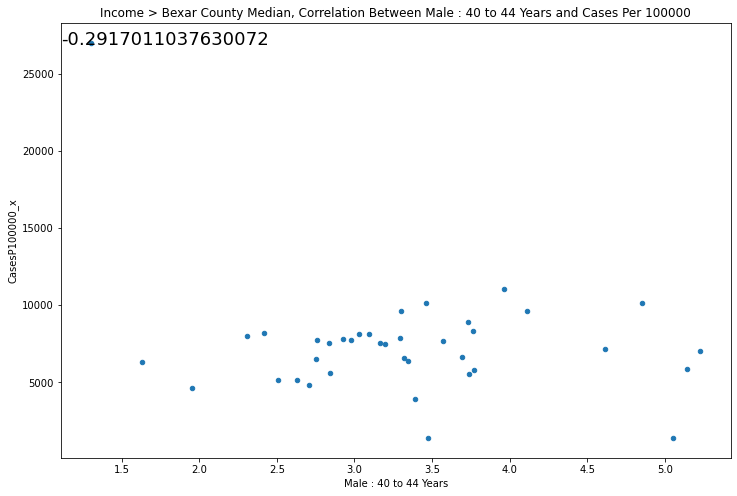

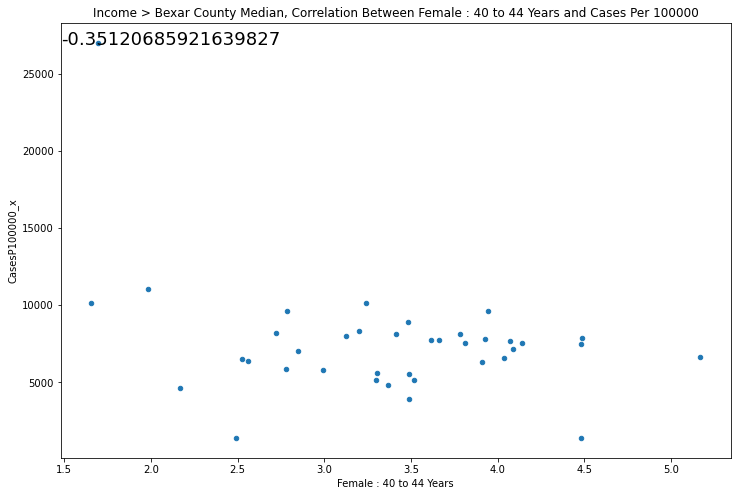

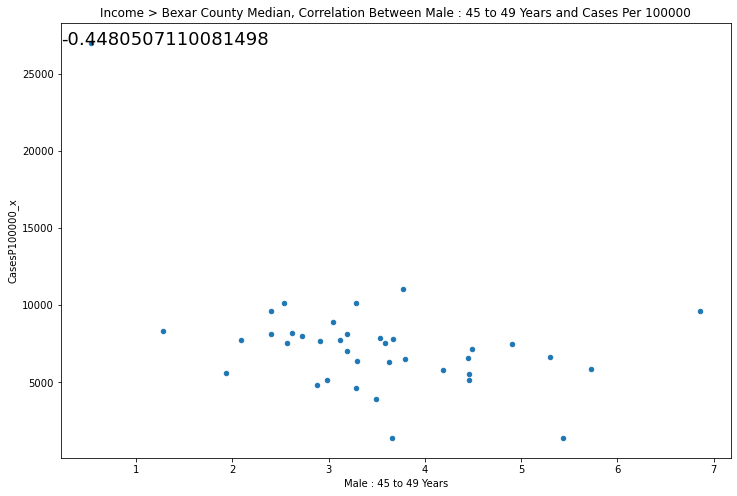

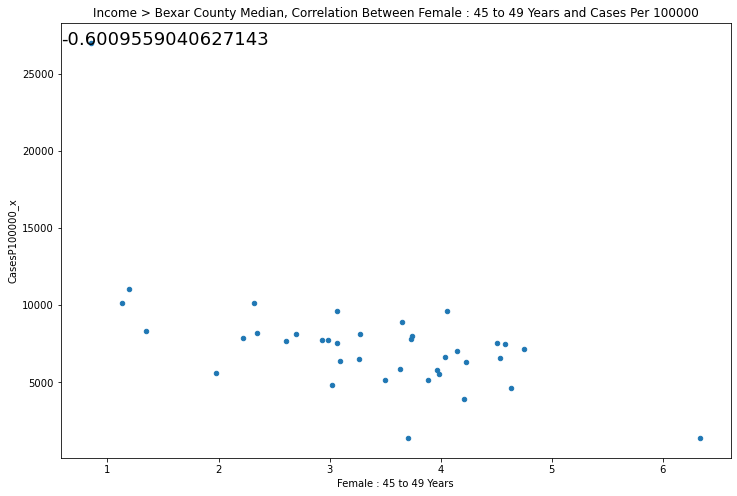

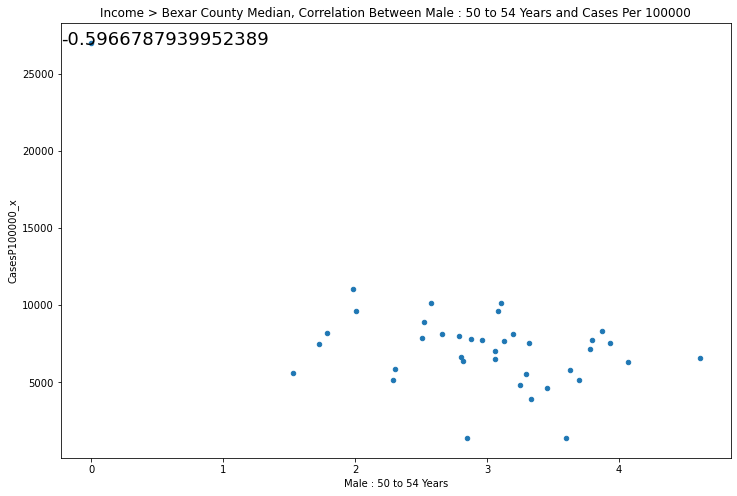

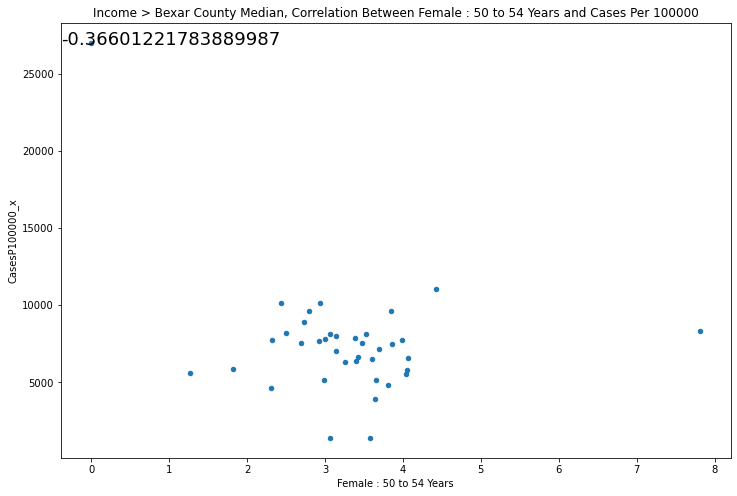

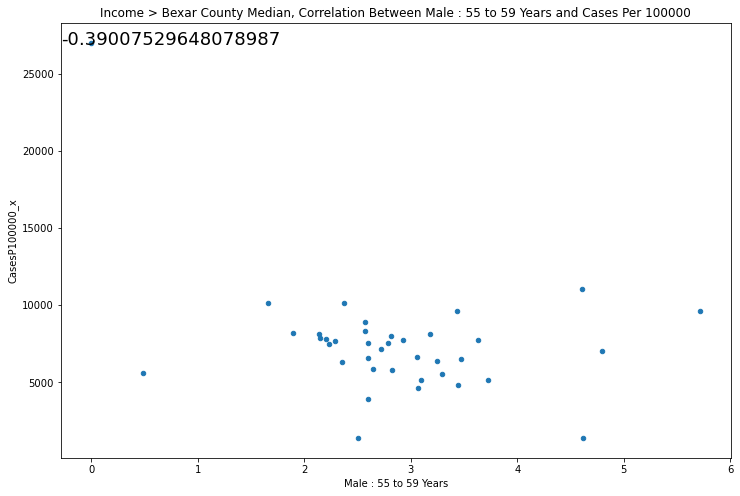

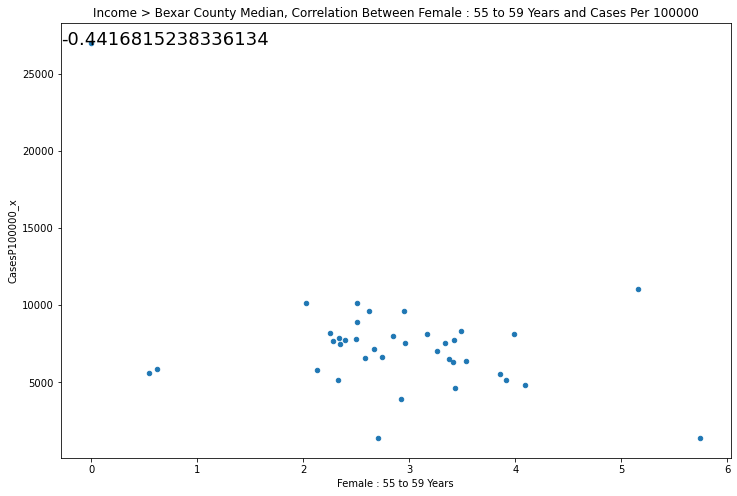

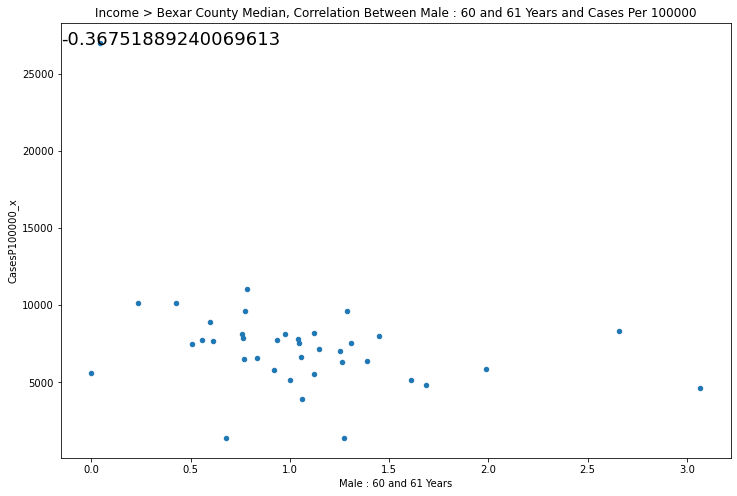

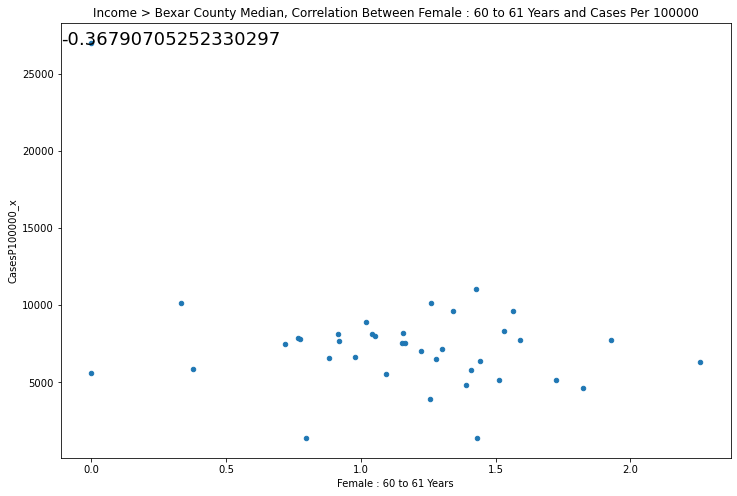

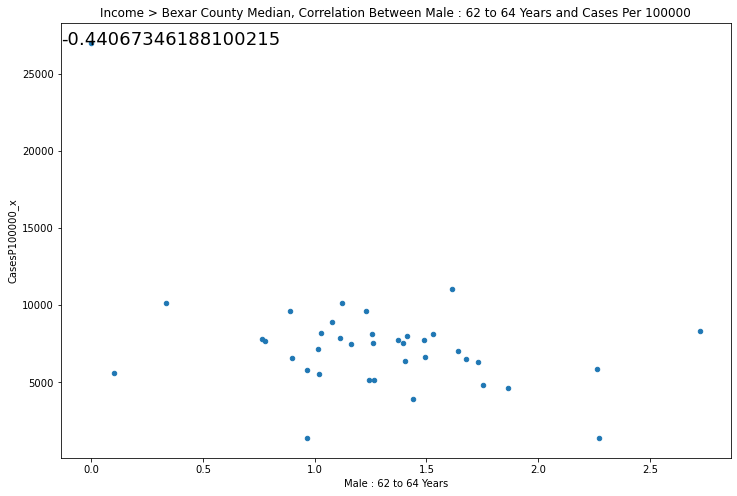

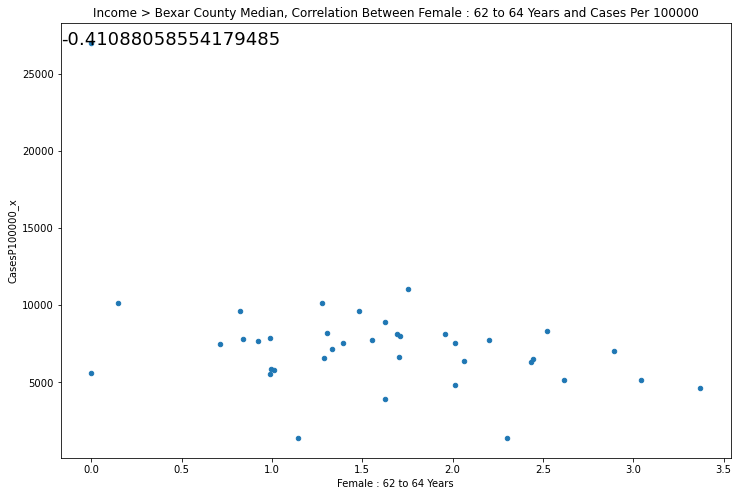

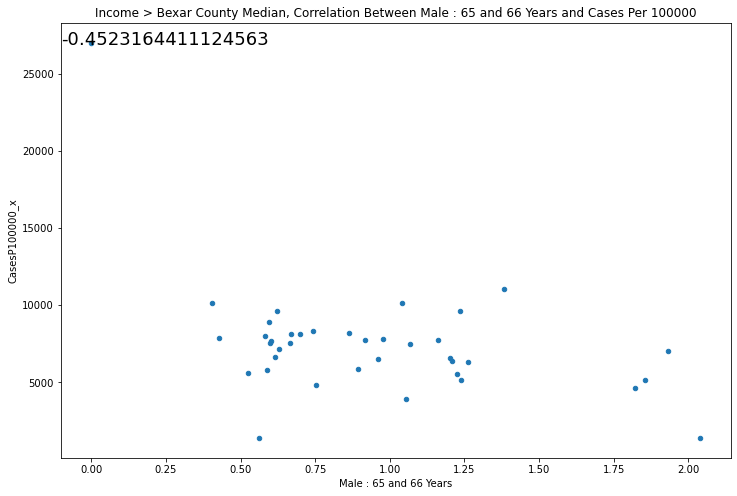

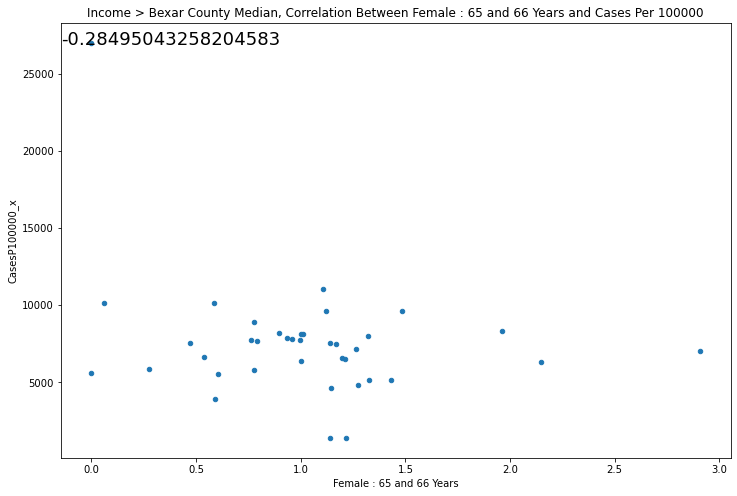

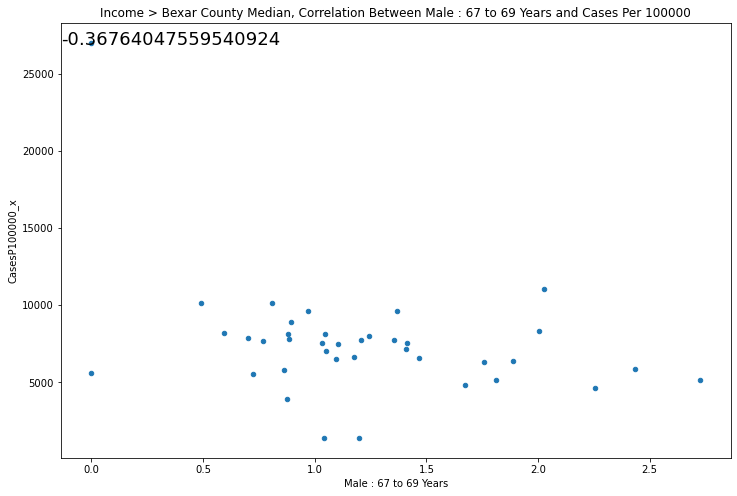

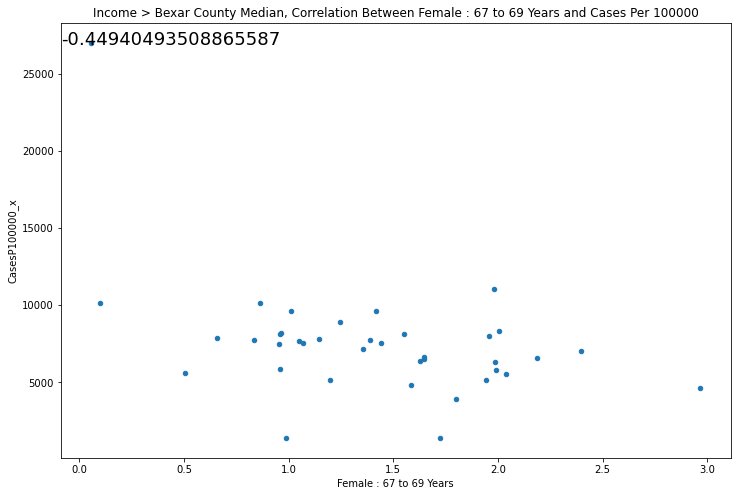

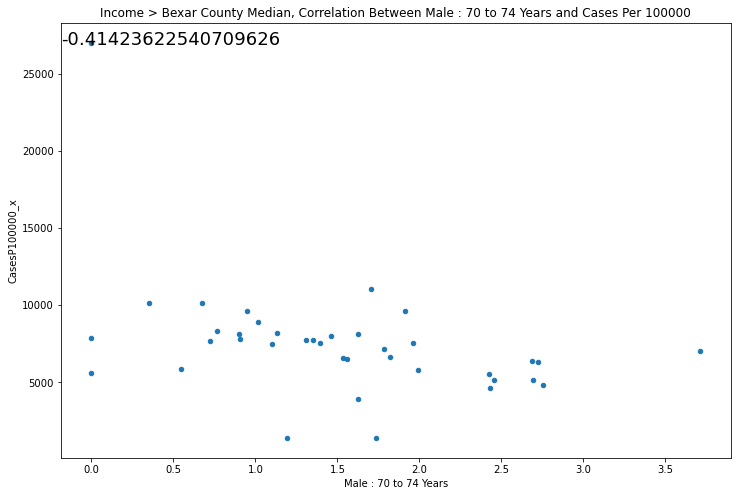

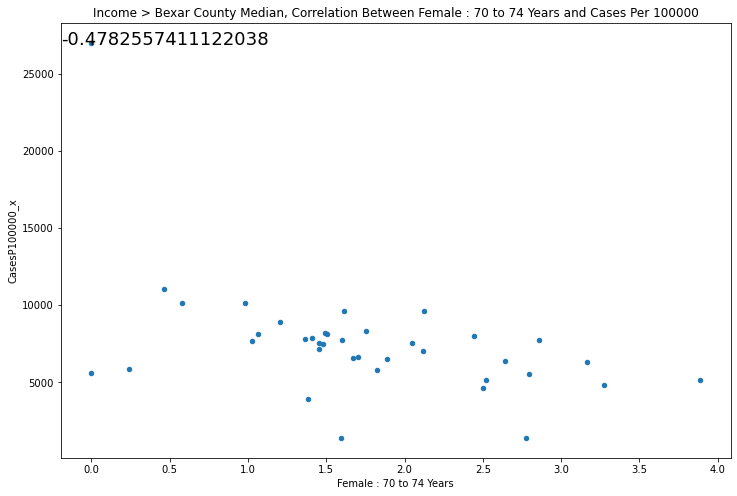

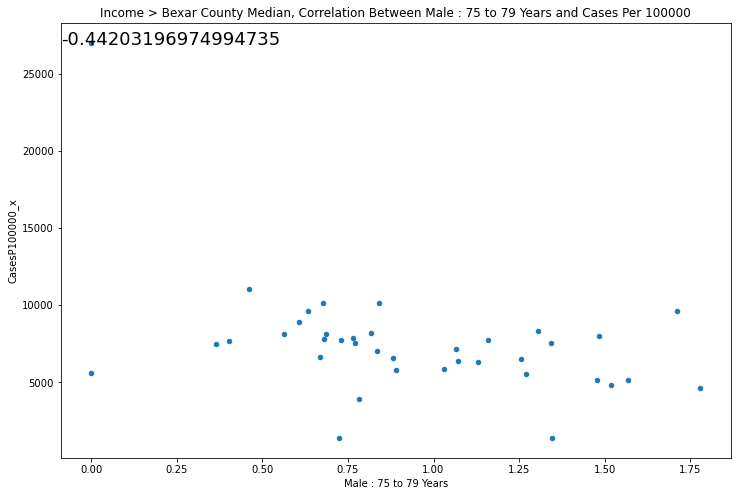

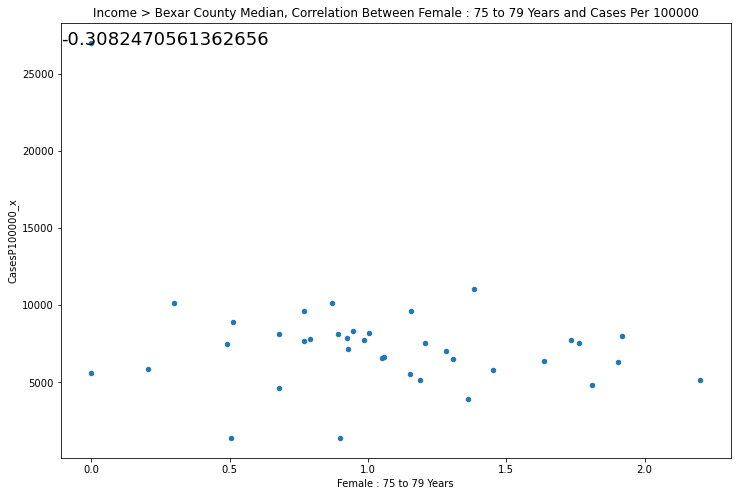

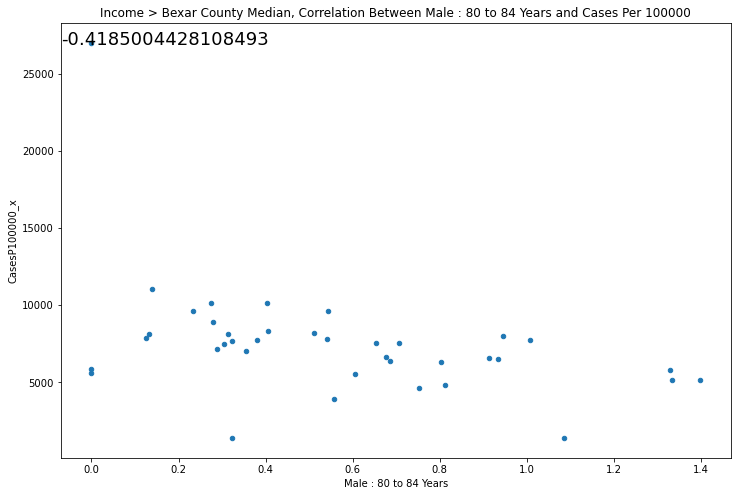

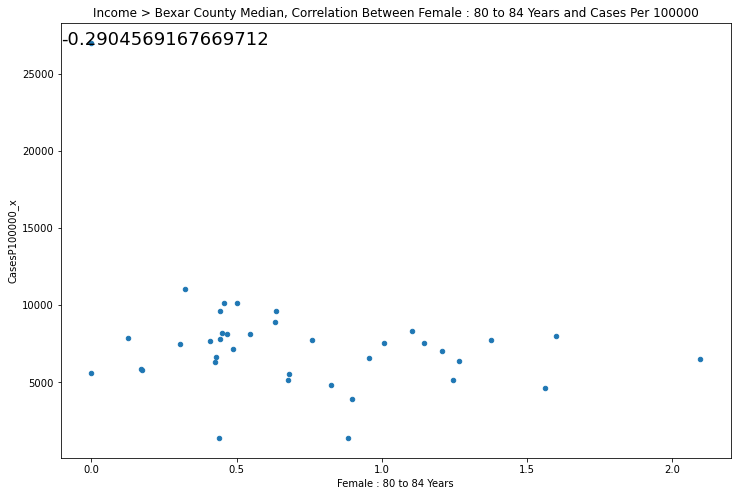

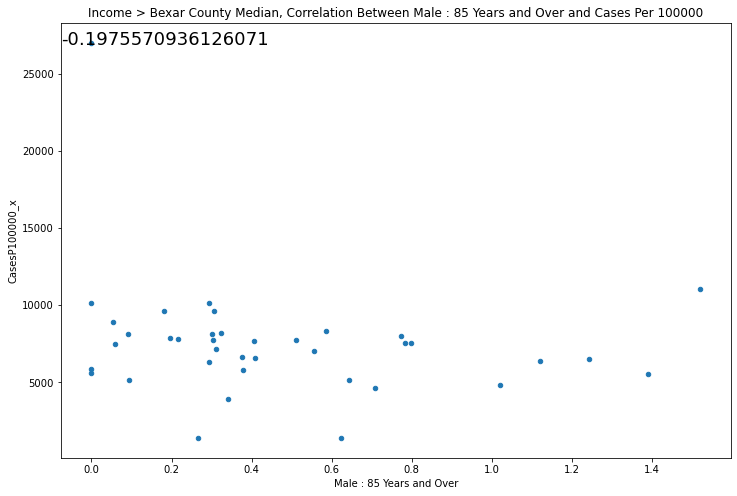

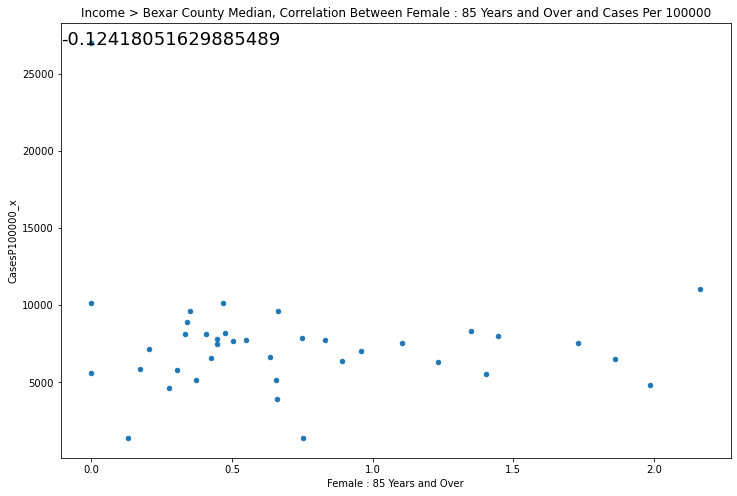

In [26]:
#Scatter plots for above median income
age_list =["Total Male", "Total Female", "Male : Under 5 Years", "Female : Under 5 Years", "Male : 5 to 9 Years", "Female : 5 to 9 Years",
            "Male : 10 to 14 Years", "Female : 10 to 14 Years", "Male : 15 to 17 Years", "Female : 15 to 17 Years", "Male : 18 and 19 Years", "Female : 18 and 19 Years",
            "Male : 20 Years", "Female : 20 Years", "Male : 21 Years", "Female : 21 Years", "Male : 22 to 24 Years",
            "Female : 22 to 24 Years", "Male : 25 to 29 Years", "Female : 25 to 29 Years", "Male : 30 to 34 Years",
            "Female : 30 to 34 Years", "Male : 35 to 39 Years", "Female : 35 to 39 Years", "Male : 40 to 44 Years",
            "Female : 40 to 44 Years", "Male : 45 to 49 Years", "Female : 45 to 49 Years", "Male : 50 to 54 Years",
            "Female : 50 to 54 Years", "Male : 55 to 59 Years", "Female : 55 to 59 Years", "Male : 60 and 61 Years",
             "Female : 60 to 61 Years", "Male : 62 to 64 Years", "Female : 62 to 64 Years", "Male : 65 and 66 Years",
            "Female : 65 and 66 Years", "Male : 67 to 69 Years", "Female : 67 to 69 Years", "Male : 70 to 74 Years",
            "Female : 70 to 74 Years", "Male : 75 to 79 Years", "Female : 75 to 79 Years", "Male : 80 to 84 Years",
            "Female : 80 to 84 Years", "Male : 85 Years and Over", "Female : 85 Years and Over"]

for element in age_list:
    age_abovemedian.plot.scatter(element,"CasesP100000_x", figsize = (12,8),title=f'Income > Bexar County Median, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(age_abovemedian[element],
                                 age_abovemedian["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

In [31]:
#export median income filters for ethnicity comparison
belowmedian["ZIP_CODE"].to_csv(r'belowmedian_filter')
abovemedian["ZIP_CODE"].to_csv(r'abovemedian_filer')

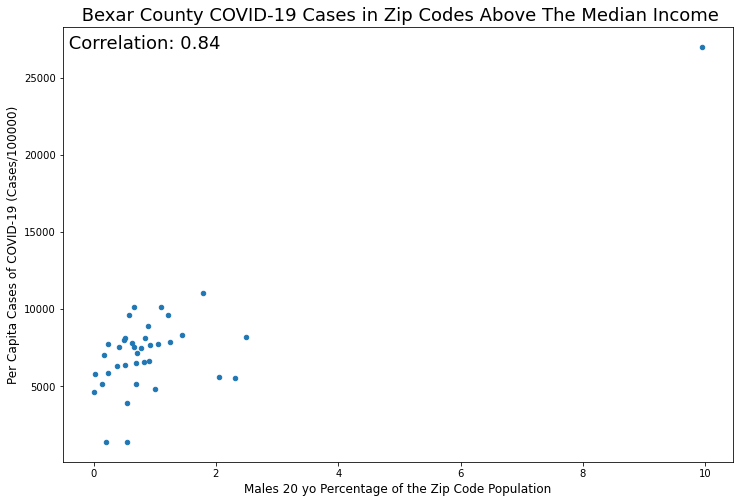

In [37]:
#Scatter plots for zipcodes below median income
age_abovemedian.plot.scatter('Male : 20 Years',"CasesP100000_x", figsize = (12,8))
plt.title(f' Bexar County COVID-19 Cases in Zip Codes Above The Median Income', fontsize =18)
plt.xlabel("Males 20 yo Percentage of the Zip Code Population", fontsize =12)
plt.ylabel("Per Capita Cases of COVID-19 (Cases/100000)", fontsize = 12)
correlation = st.pearsonr(age_abovemedian["Male : 20 Years"], age_abovemedian["CasesP100000_x"])
plt.annotate(f' Correlation: {round(correlation[0],2)}',xy=(0,0.95),fontsize = 18,xycoords='axes fraction')
plt.savefig("AboveMedianIncomeMale20.png")